## Pump it Up: Data Mining the Water Table- Project#3

* Student name: ***Deepali Sharma***
* Student pace: ***Flex***
* Scheduled project review date/time: ***January, 2023***
* Instructor name: ***Abhineet Kulkarni***

### Data Exploration and Business Problem
* The data was obtained from the **Pump it Up: Data Mining the Water Table** provided at [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). The data is collected from Taarifa and the Tanzanian Ministry of Water, and is used to predict which pumps are functional, which need some repairs, and which don't work at all!  The Taarifa Platform is an open source API designed to use citizen feedback on local problems.The major goal of this project is to provide clean water access to the people of Tanzania. Currently, the people of Tanzania have poor access to clean drinking water throughout the entire country. Approximately 47% of all Tanzanian citizens do not have access to clean drinking water. Over 1.4 billion dollars in foreign aid has been giving to Tanzania in an attempt to help fix the freshwater crisis. However, the Tanzanian government has been struggling to fix this issue. 


* The main focus of this study is to predict the functionality of water pumps using machine learning models. If models are accurate, this could help save the Tanzanian government a lot of time and money. Predicting correctly the faulty water pumps would help to cut the cost needed to send workers to each and every water pump for inspection. The government can use this study to find the water pumps that are working, need repair and the  ones aren’t working at all.

* A complete list of variables in the dataset is given below

**Target Feature**:
* `status_group`- If the water pump is functional, non-functional or need repairs 

**Predictive Features**:
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint


## Modeling

1. The data was split into training and test sets.
2. The data was pre-processed. This is a classification problem with three classes! A detailed data exploration was done to understand different variables provided in the dataset. See Notebook eda.ipynb in the same github repository
3. Several types of classifiers were built, tuned (using GridSearchCV to test combinations of hyperparameters) and validated:

    - Logistic Regression
    - Random Forest
    - XGradient Boosted
    - Stacking Classifier (using above models)


## Evaluation

4. I used Roc_Auc mostly and also looked at f-scores as the scoring metric for tuning hyperparameters and evaluating model performance. 

    * The Roc_Auc metric utilizes **"probabilities"** of class prediction. Based on that, we’re able to more precisely evaluate and compare the models. We also
    * We also care equally about positive and negative classes, and the roc curve gives a desirable balance between **sensitivity/recall (maximizing True Negative Rate)** and **Precision scores** .
    * To bulid a good model one needs to carefully evaluate the predictions and understand the role of different features that drive the model predictions. A careful comparison between test and train data helps to understand to a great extent the model characteristics

## Major Issues
* It was a challenging dataset given its length ~(60K entries) and number of categorical variables (which cause issue in one-hot encoding that generates too many columns). This was a major issue when I had to run GridSearchCV for hyperparameter tunings. I wasnt able to run even one model even after reducing the number of columns from 41 to 23. I killed the process after waiting for 1.5 days. This is when I found out about [HalvingGridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html). This reduces the running time by factors anywhere ranging from 2-5. Sklearn says its still in experimentation and examples show that the parameters found by two methods are pretty much same. Using this I was able to run GridSearch in a few hours for each model scenario. However this feature is only available in recent version of sklearn and so I had to update it

* The second issue was that this is a ternary classification problem (not the usual Yes/No binary), so I had to use **ovr (One vs Rest)** option and to plot ROC curves for this multi-label problem required update sklearn as well.

## Results
* XGB Classifier is the best model found in this study with an **roc_auc_score** of about 91% for the training set and 89% for the test data.

## Next steps to be implemented
* One of the things that I really want to do is to see if there is any effect of installer and/or funder in the model predictions. My naive thinking tells me that there should be. However my preliminary test with installer column includes showed almost same results for scores as without it (~0.1% difference). But since the model was taking considerable large time to run even after I compressed the values where I grouped similar values to one broader category, I had to drop it from my final dataset. But I do want to explore it more and see if this really doesnt make any difference. If I submit this project for the competition, I will certainly explore this!

* The other column that I didnt study at all was **"scheme_name"**. This column has 47% missing data. Time permitting I would have studied this, but I ran short of time. So in future, I would like to study if this variable will have any effect on modeling.

* One more thing that I need to do is to see if there is a difference in the resulting best model from GridSearchCV if I use "roc_scoring" instead of "f1_weighted" option. There is difference in the two approaches as one considers harmonic mean between sensitivity /recall while roc_score maximizes the probablities for different classes. 

In [1]:
import os, sys, time
print(sys.executable)

/usr/local/anaconda3/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#pd.set_option('display.max_rows', 10)
import seaborn as sns
#sns.set_style("whitegrid")
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as mticker
import missingno as mssno

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import plot_confusion_matrix # plot_confusion_matrix is a visual tool added in the latest version of scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix # if you are running an older version, use confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingRegressor

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline # You need imblearn Pipeline for Smote work in a Pipeline
from itertools import cycle
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")
%load_ext autotime

time: 170 µs (started: 2023-01-10 17:09:04 -05:00)


In [3]:
from xgboost import XGBClassifier

time: 221 µs (started: 2023-01-10 17:09:04 -05:00)


In [4]:
# This function plots confusion matrix (train) as well as roc_auc, recall, and precision scores

def model_evaluation_roc_auc(model):
    with plt.style.context('seaborn-talk'):
        fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12, 5))

        # Plot confusion matrix for the test set
        ConfusionMatrixDisplay.from_estimator(baseline_logreg, X_test, y_test,normalize='true',ax=ax1,cmap='Blues')
        ConfusionMatrixDisplay.from_estimator(baseline_logreg, X_train, y_train,normalize='true',ax=ax2,cmap='Blues')
        ax1.grid(False) 
        ax2.set_title("Confusion Matrix - Train")
        
        # plot Roc curve for the test and train
        #plot_roc_curve(model,X_test,y_test,ax=axs[1,0])
        #plot_roc_curve(model,X_train,y_train,ax=axs[1,1])
        plt.show()
        
        # Print classification Scores for the test set
        y_true = y_test
        y_pred = model.predict(X_test)
        divider = ('----' * 14) 
        table_title = 'Classification Report - Test:'
        table = classification_report(y_true, y_pred, digits=3)
        print('\n', divider, table_title, divider, table, divider, divider, '\n' , sep='\n') 
        
        # Print roc_auc for test and train 
        #roc_score_train_cv = cross_val_score(estimator=model, X=X_train,  y=y_train, 
                                        # cv=StratifiedKFold(shuffle=True), scoring='roc_auc').mean()
        roc_score_train = roc_auc_score(y_train, model.predict_proba(X_train),multi_class='ovr') 
        roc_score_test = roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
        
        y_train_pred   = model.predict(X_train)
        y_test_pred    = model.predict(X_test)
        # Find F- Scores:
        recall_score_train = recall_score(y_train, y_train_pred, average='weighted')
        recall_score_test = recall_score(y_test, y_test_pred, average='weighted')
        
        # Print accuracy for test and train 
        acc_score_train = accuracy_score(y_train, y_train_pred) 
        acc_score_test = accuracy_score(y_test,   y_test_pred)
        
        #print(f" Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.2%}")    
        print(f" Train Roc_Auc Score: {roc_score_train :.2%}")  
        print(f" Test Roc_Auc Score: {roc_score_test :.2%}")    
        print('\n', divider, '\n' , sep='\n')
        
        print(f" Train Accuracy Score: {acc_score_train :.2%}")  
        print(f" Test Accuracy Score: {acc_score_test :.2%}")    
        print('\n', divider, '\n' , sep='\n')
        
        print(f" Train Sensitivity/Recall score: {recall_score_train :.2%}")    
        print(f" Test Sensitivity/Recall score: {recall_score_test :.2%}")  
        print('\n', divider, '\n' , sep='\n')
        
        
        print('Train Weighted Precision: {:.2f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
        print('Test Weighted Precision: {:.2f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
        print("Train Score:{:.2f} ".format(model.score(X_train, y_train)))
        print("Test Score:{:.2f} ".format(model.score(X_test, y_test)))
                                       
        

time: 976 µs (started: 2023-01-10 17:09:07 -05:00)


In [6]:
## This function is used for Feature engineering dataset. installer column had too may values, and one can group
#many of those into similar broad categories.e.g. we can replace ('fini water', 'fin water', 'finn water', 'finwater',
#'finwate') with just finw as they all seem to fall under this one category. This functions groups similar values 
# to a broader group. This helps us to reduce the number of one-hot encoded categories for this categorical varaible
def clean_installer(df):

    df['installer'] = df['installer'].astype(str).str.lower()
    df['installer'].replace(
        to_replace=(
            'fini water', 'fin water', 'finn water', 'finwater', 'finwate'),
        value='finw', inplace=True)
    df['installer'].replace(to_replace=('jaica co'), value='jaica', inplace=True)
    df['installer'].replace(
        to_replace=(
            'district water department', 'district water depar', 'district council',
            'district counci', 'village council orpha','kibaha town council',
            'village council', 'coun', 'village counil', 'council',
            'mbulu district council', 'counc', 'village council .oda',
            'sangea district coun', 'songea district coun', 'villege council',
            'district  council', 'quick win project /council', 'mbozi district council',
            'village  council', 'municipal council', 'tabora municipal council',
            'wb / district council'),
        value='council', inplace=True)
    df['installer'].replace(
        to_replace=(
            'rc church', 'rc churc', 'rcchurch/cefa', 'irc', 'rc', 'rc ch', 'hw/rc',
            'rc church/central gover', 'kkkt church', 'pentecost church', 'roman church',
            'rc/mission', 'rc church/cefa', 'lutheran church', 'tag church',
            'free pentecoste church of tanz', 'rc c', 'church', 'rc cathoric',
            'morovian church', 'cefa/rc church', 'rc mission', 'anglican church',
            'church of disciples', 'anglikana church', 'cetral government /rc',
            'pentecostal church', 'cg/rc', 'rc missionary', 'sda church', 'methodist church', 'trc',
            'rc msufi', 'haidomu lutheran church', 'baptist church', 'rc church brother',
            'st magreth church', 'anglica church', 'global resource co', 'rc mi',
            'baptist church of tanzania', 'fpct church', 'rc njoro', 'rc .church',
            'rc mis', 'batist church', 'churc', 'dwe/anglican church','missi', 'mission',
            'ndanda missions', 'rc/mission', 'cvs miss', 'missionaries', 'hydom luthelani',
            'luthe', 'haydom lutheran hospital', 'lutheran', 'missio', 'germany missionary',
            'grail mission kiseki bar', 'missionary', 'heri mission', 'german missionsry',
            'wamissionari wa kikatoriki', 'neemia mission', 'wamisionari wa kikatoriki'),
        value='church', inplace=True)
    df['installer'].replace(
        to_replace=(
            'central government', 'gove', 'central govt', 'gover', 'cipro/government',
            'governme', 'adra /government', 'isf/government', 'adra/government',
            'government /tcrs', 'village govt', 'government', 'government /community',
            'concern /government', 'goverm', 'village government', 'cental government',
            'govern', 'cebtral government', 'government /sda', 'tcrs /government',
            'tanzania government', 'centra govt', 'colonial government', 'misri government',
            'government and community', 'cetral government /rc', 'concern/government',
            'government of misri', 'lwi &central government', 'governmen', 'government/tcrs', 'government /world vision',
            'centra government'),
        value='tanzanian government', inplace=True)
    df['installer'].replace(
        to_replace=(
            'world vission', 'world division', 'word divisio','world visiin'),
        value='world vision', inplace=True)
    df['installer'].replace(to_replace=('unicrf'), value='unicef', inplace=True)
    df['installer'].replace(
        to_replace=(
            'commu', 'olgilai village community', 'adra /community', 'adra/community',
            'rwe/ community', 'killflora /community', 'communit', 'taboma/community',
            'arab community', 'adra/ community', 'sekei village community', 'rwe/community',
            'arabs community', 'village community', 'government /community',
            'dads/village community', 'killflora/ community', 'mtuwasa and community',
            'rwe /community', 'ilwilo community', 'summit for water/community',
            'igolola community', 'ngiresi village community', 'rwe community',
            'african realief committe of ku', 'twesa /community', 'shelisheli commission',
            'twesa/ community', 'marumbo community', 'government and community',
            'community bank', 'kitiangare village community', 'oldadai village community',
            'twesa/community', 'tlc/community', 'maseka community', 'islamic community',
            'district community j', 'village water commission', 'village community members',
            'tcrs/village community', 'village water committee', 'comunity'),
        value='community', inplace=True)
    df['installer'].replace(
        to_replace=(
            'danid', 'danda','danida co', 'danny', 'daniad', 'dannida', 'danids'),
        value='danida', inplace=True)
    df['installer'].replace(
        to_replace=(
            'hesaws', 'huches', 'hesaw', 'hesawz', 'hesawq', 'hesewa'),
        value='hesawa', inplace=True)
    df['installer'].replace(
        to_replace=(
            'dwsp', 'kkkt _ konde and dwe', 'rwe/dwe', 'rwedwe', 'dwe/', 'dw', 'dwr',
            'dwe}', 'dwt', 'dwe /tassaf', 'dwe/ubalozi wa marekani', 'consultant and dwe',
            'dwe & lwi', 'ubalozi wa marekani /dwe', 'dwe&', 'dwe/tassaf', 'dw$',
            'dw e', 'tcrs/dwe', 'dw#', 'dweb', 'tcrs /dwe', 'water aid/dwe', 'dww'),
        value='dwe', inplace=True)
    df['installer'].replace(
        to_replace=(
            'africa muslim', 'muslimu society(shia)', 'africa muslim agenc',
            'african muslims age', 'muslimehefen international','islamic',
            'the isla', 'islamic agency tanzania',  'islam', 'nyabibuye islamic center'),
        value='muslims', inplace=True)
    df['installer'].replace(
        to_replace=(
            'british colonial government', 'british government', 'britain'),
        value='british', inplace=True)
    df['installer'].replace(
        to_replace=(
            'tcrs/tlc', 'tcrs /care', 'cipro/care/tcrs', 'tcrs kibondo', 'tcrs.tlc',
            'tcrs /twesa', 'tassaf /tcrs', 'tcrs/care', 'tcrs twesa', 'rwe/tcrs',
            'tcrs/twesa', 'tassaf/ tcrs', 'tcrs/ tassaf', 'tcrs/ twesa', 'tcrs a',
            'tassaf/tcrs'),
        value='tcrs', inplace=True)
    df['installer'].replace(
        to_replace=(
            'kkkt-dioces ya pare', 'kkkt leguruki', 'kkkt ndrumangeni', 'kkkt dme',
            'kkkt kilinga', 'kkkt canal', 'kkkt katiti juu', 'kkkt mareu'),
        value='kkkt', inplace=True)
    df['installer'].replace(to_replace=('norad/'), value='norad', inplace=True)
    df['installer'].replace( to_replace=('tasaf/dmdd', 'dmdd/solider'),
        value='dmdd', inplace=True)
    df['installer'].replace(
        to_replace=('cjejow construction', 'cjej0'), value='cjejow', inplace=True)
    df['installer'].replace(
        to_replace=(
            'china henan constuction', 'china henan contractor', 'china co.', 'chinese'),
        value='china', inplace=True)
    df['installer'].replace(
        to_replace=(
            'local contract', 'local technician', 'local', 'local  technician',
            'locall technician', 'local te', 'local technitian', 'local technical tec',
            'local fundi', 'local technical', 'localtechnician', 'village local contractor',
            'local l technician'),
        value='local', inplace=True)
    df['installer'].replace(
        to_replace=(
            'oikos e .africa', 'oikos e.africa', 'africa amini alama',
            'africa islamic agency tanzania', 'africare', 'african development foundation',
            'oikos e. africa', 'oikos e.afrika', 'afroz ismail', 'africa', 'farm-africa',
            'oikos e africa', 'farm africa', 'africaone', 'tina/africare', 'africaone ltd',
            'african reflections foundation', 'africa m'),
        value='africa', inplace=True)
    df['installer'].replace(to_replace=('0', 'nan', '-'), value='other', inplace=True)
    df_installer_cnt = df.groupby('installer')['installer'].count()
    other_list = df_installer_cnt[df_installer_cnt<71].index.tolist()
    df['installer'].replace(to_replace=other_list, value='other', inplace=True)

time: 1.24 ms (started: 2023-01-10 17:11:19 -05:00)


In [7]:
## Similar to above installer function, thes imilar group of values are merged into similar broader categories
def clean_funder(df):
    
    df['funder'] = df['funder'].astype(str).str.lower()
    df['funder'].replace(
        to_replace=(
            'kkkt_makwale', 'kkkt-dioces ya pare', 'world vision/ kkkt', 'kkkt church',
            'kkkt leguruki', 'kkkt ndrumangeni', 'kkkt dme', 'kkkt canal', 'kkkt usa',
            'kkkt mareu'),
        value='kkkt', inplace=True)
    df['funder'].replace(
        to_replace=(
            'government of tanzania', 'norad /government', 'government/ community',
            'cipro/government', 'isf/government', 'finidagermantanzania govt',
            'government /tassaf', 'finida german tanzania govt', 'village government',
            'tcrs /government', 'village govt', 'government/ world bank',
            'danida /government', 'dhv/gove', 'concern /govern', 'vgovernment',
            'lwi & central government', 'government /sda', 'koica and tanzania government',
            'world bank/government', 'colonial government', 'misri government',
            'government and community', 'concern/governm', 'government of misri',
            'government/tassaf', 'government/school', 'government/tcrs', 'unhcr/government',
            'government /world vision', 'norad/government'),
        value='government', inplace=True)
    df['funder'].replace(
        to_replace=(
            'british colonial government', 'japan government', 'china government',
            'finland government', 'belgian government', 'italy government',
            'irish government', 'egypt government', 'iran gover', 'swedish', 'finland'),
        value='foreign government', inplace=True)
    df['funder'].replace(
        to_replace=(
            'rc church', 'anglican church', 'rc churc', 'rc ch', 'rcchurch/cefa',
            'irc', 'rc', 'churc', 'hw/rc', 'rc church/centr', 'pentecosta church',
            'roman church', 'rc/mission', "ju-sarang church' and bugango",
            'lutheran church', 'roman cathoric church', 'tag church ub', 'aic church',
            'free pentecoste church of tanz', 'tag church', 'fpct church', 'rc cathoric',
            'baptist church', 'morovian church', 'cefa/rcchurch', 'rc mission',
            'bukwang church saints', 'agt church', 'church of disciples', 'rc mofu',
            "gil cafe'church'", 'pentecostal church', 'bukwang church saint',
            'eung am methodist church', 'rc/dwe', 'cg/rc', 'eung-am methodist church',
            'rc missionary', 'sda church', 'methodist church', 'rc msufi',
            'haidomu lutheran church', 'nazareth church', 'st magreth church',
            'agape churc', 'rc missi', 'rc mi', 'rc njoro', 'world vision/rc church',
            'pag church', 'batist church', 'full gospel church', 'nazalet church',
            'dwe/anglican church', 'missi', 'mission', 'missionaries', 'cpps mission',
            'cvs miss', 'grail mission kiseki bar', 'shelisheli commission', 'missionary',
            'heri mission', 'german missionary', 'wamissionari wa kikatoriki',
            'rc missionary', 'germany missionary', 'missio', 'neemia mission', 'rc missi',
            'hydom luthelani', 'luthe', 'lutheran church',  'haydom lutheran hospital',
            'village council/ haydom luther', 'lutheran', 'haidomu lutheran church',
            'resolute golden pride project', 'resolute mininggolden pride',
            'germany cristians'),
        value='church', inplace=True)
    df['funder'].replace(
        to_replace=(
            'olgilai village community', 'commu', 'community', 'arab community',
            'sekei village community', 'arabs community', 'village community',
            'mtuwasa and community', 'ilwilo community', 'igolola community',
            'ngiresi village community', 'marumbo community', 'village communi',
            'comune di roma', 'comunity construction fund', 'community bank',
            "oak'zion' and bugango b' commu", 'kitiangare village community',
            'oldadai village community', 'tlc/community', 'maseka community',
            'islamic community',  'tcrs/village community', 'buluga subvillage community',
            'okutu village community'),
        value='community', inplace=True)
    df['funder'].replace(
        to_replace=(
            'council', 'wb / district council', 'cdtfdistrict council',
            'sangea district council', 'mheza distric counc', 'kyela council',
            'kibaha town council', 'swidish', 'mbozi district council', 
            'village council/ rose kawala',  'songea municipal counci',
            'quick win project /council', 'village council', 'villege council',
            'tabora municipal council', 'kilindi district co', 'kigoma municipal council',
            'district council', 'municipal council', 'district medical',
            'sengerema district council', 'town council', 'mkinga  distric cou',
            'songea district council', 'district rural project', 'mkinga distric coun',
            'dadis'),
        value='district', inplace=True)
    df['funder'].replace(
        to_replace=(
            'tcrs.tlc', 'tcrs /care', 'tcrst', 'cipro/care/tcrs', 'tcrs/care', 'tcrs kibondo'),
        value='tcrs', inplace=True)
    df['funder'].replace(
        to_replace=(
            'fini water', 'finw', 'fin water', 'finn water', 'finwater'),
        value='fini', inplace=True)
    df['funder'].replace(
        to_replace=(
            'islamic', 'the isla', 'islamic found', 'islamic agency tanzania',
            'islam', 'muislam', 'the islamic', 'nyabibuye islamic center', 'islamic society', 'african muslim agency',
            'muslims', 'answeer muslim grou', 'muslimu society(shia)',
            'unicef/african muslim agency', 'muslim world', 'muslimehefen international',
            'shear muslim', 'muslim society'),
        value='islam', inplace=True)
    df['funder'].replace(
        to_replace=('danida', 'ms-danish', 'unhcr/danida', 'tassaf/ danida'),
        value='danida', inplace=True)
    df['funder'].replace(
        to_replace=(
            'hesawa', 'hesawz', 'hesaw', 'hhesawa', 'hesawwa', 'hesawza', 'hesswa',
            'hesawa and concern world wide'),
        value='hesawa', inplace=True)
    df['funder'].replace(
        to_replace=('world vision/adra', 'game division', 'worldvision'),
        value='world vision', inplace=True)
    df['funder'].replace(
        to_replace=(
            'germany republi', 'a/co germany', 'aco/germany', 'bingo foundation germany',
            'africa project ev germany', 'tree ways german'),
        value='germany', inplace=True)
    df['funder'].replace(to_replace=('0', 'nan', '-'), value='other', inplace=True)
    df_funder_cnt = df.groupby('funder')['funder'].count()
    other_list = df_funder_cnt[df_funder_cnt<98].index.tolist()
    df['funder'].replace(to_replace=other_list, value='other', inplace=True)    

time: 1.17 ms (started: 2023-01-10 17:11:23 -05:00)


In [74]:
df_data = pd.read_csv("Data_train.csv")
df_labels = pd.read_csv("Data_train_labels.csv")
df = pd.merge(df_data,df_labels,how='inner',left_on='id', right_on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


time: 389 ms (started: 2023-01-10 17:24:04 -05:00)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

## Data Exploration, Cleaning and Feature Engineering

In [77]:
df_clean= df

time: 209 µs (started: 2023-01-10 17:24:38 -05:00)


* This is a temporary dataframe to show some of the main results from EDA notebook (project_v3.ipynb). That notebook contains a lot of plots and other stuff that I did to find and study relevant columns

In [78]:
df_ana = df

time: 5.8 ms (started: 2023-01-10 17:24:41 -05:00)


#### Feature Engineering
* I want to create an **age** variable based on the **construction_year** information. However, a large subset of data has **0** for construction_year. So I will assign it as 60 under the assumption that those wells construction date is unknown and most likely predates 1960 which is the earliest recorded year in this dataset. The most recent year in the data is 2013. So I define age from 2014.
* Also I will bin the age in 5 years intervals

In [79]:
from datetime import date
from datetime import datetime
df_clean['date_recorded']=pd.to_datetime(df_clean['date_recorded'])
df_clean['yr_record']=df_clean['date_recorded'].dt.year.astype('int')
df_clean['month_record']=df_clean['date_recorded'].dt.month.astype('int')
df_clean[['date_recorded','yr_record','month_record']]
df_clean['age'] = (2014 - df_clean['construction_year'])
df_clean['age'] = df_clean['age'].replace(2014, 60)

time: 29 ms (started: 2023-01-10 17:24:44 -05:00)


In [80]:
conditions = [
    (df_clean['age'] <=5),
    (df_clean['age'] > 5) & (df_clean['age'] <= 10),
    (df_clean['age'] > 10) & (df_clean['age'] <= 15),
    (df_clean['age'] > 15) & (df_clean['age'] <= 20),
    (df_clean['age'] > 20) & (df_clean['age'] <= 25),
    (df_clean['age'] > 25) & (df_clean['age'] <= 30),
    (df_clean['age'] > 30) & (df_clean['age'] <= 35),
    (df_clean['age'] > 35) & (df_clean['age'] <= 40),
    (df_clean['age'] > 40) & (df_clean['age'] <= 45),
    (df_clean['age'] > 45) & (df_clean['age'] <= 50),
    (df_clean['age'] > 50) & (df_clean['age'] <= 55),
    (df_clean['age'] > 5) & (df_clean['age'] <= 60),
     ]
choices =[5,10,15,20,25,30,35,40,45,50,55,60]
df_clean['age'] = np.select(conditions,choices, default=0)

time: 11.6 ms (started: 2023-01-10 17:24:46 -05:00)


* Engineering the installer and Funder columns so as to merge the similar groups using the functions defined above

In [81]:
clean_installer(df_ana)
clean_funder(df_ana)

time: 2.55 s (started: 2023-01-10 17:24:51 -05:00)


* lets check if we have correlated columns and also find the columns with missing values

In [82]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 44 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null 

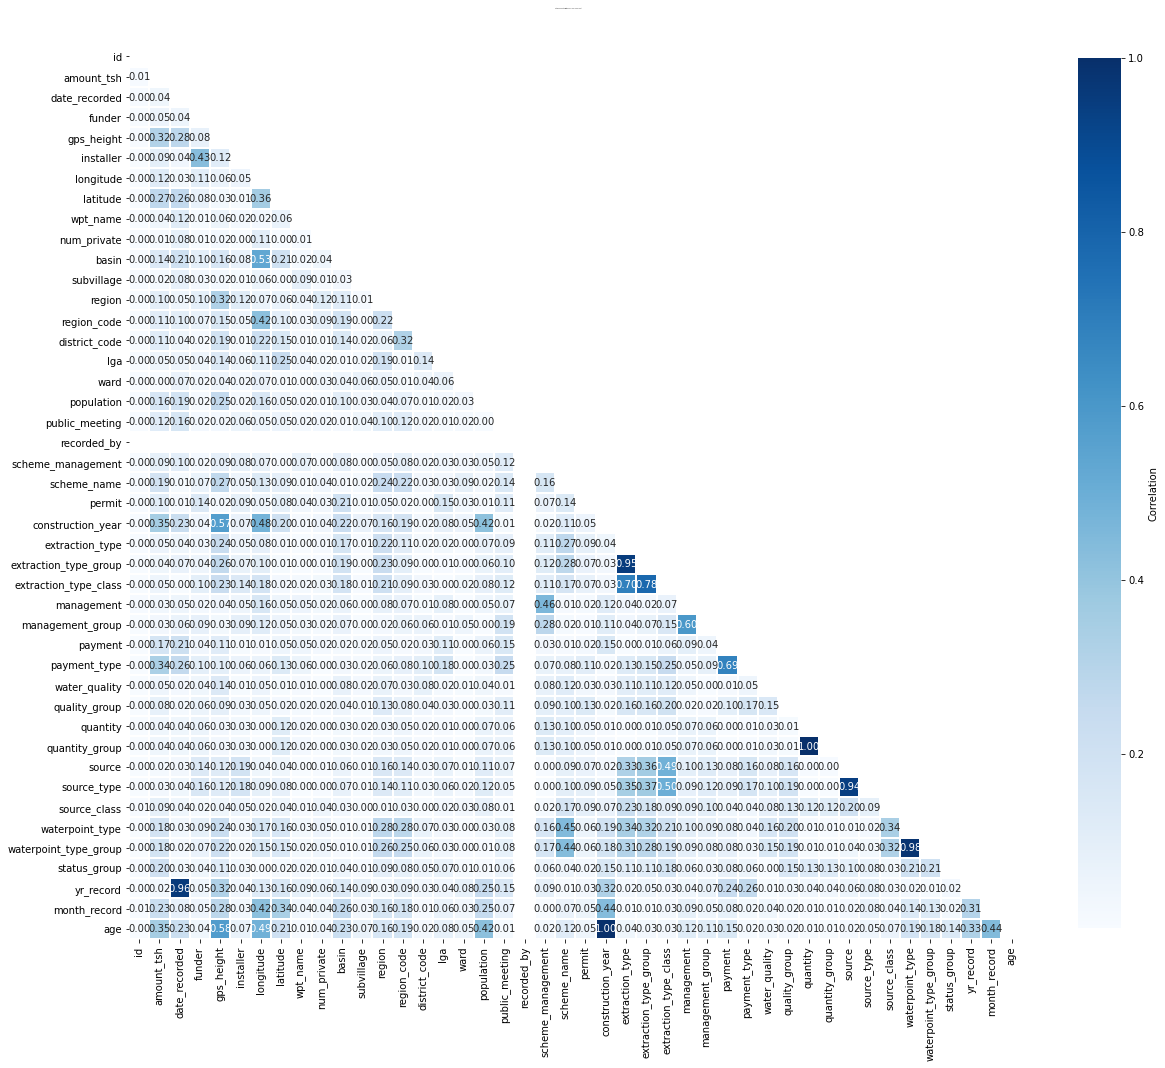

time: 5.69 s (started: 2023-01-09 14:29:20 -05:00)


In [301]:
data_cat = df_ana
data_cat = data_cat.apply(lambda x: x.astype('category').cat.codes)
corr = data_cat.corr().abs()
fig, ax=plt.subplots(figsize=(20,20))
matrix = np.triu(corr) # Getting the Upper Triangle of the correlation matrix
cbar_kws={"label": "Correlation", "shrink":0.8}
heatmap = sns.heatmap(data = corr, cmap='Blues', linewidths = 1, square= True,  ax=ax, annot=True, mask=matrix, fmt= ".2f", cbar_kws=cbar_kws) 
fig.suptitle('Heatmap of Correlation Between All Variables (Including Target)', fontsize=1, y=.84, x = .43, fontname='Arial');
heatmap;

* Based on this heatmap, one can see that there are a few columns that have high correlations such as extraction_class, extraction_type_group, and extraction_type. These columns contains same information and one of them usually superseeds the rest. Other examples include columns with quantity, source, waterpoints,payment, management etc. As such I will delete these columns. Also by construction age and recorded_yr are correlated and so will delete recorded_yr. 

<AxesSubplot:>

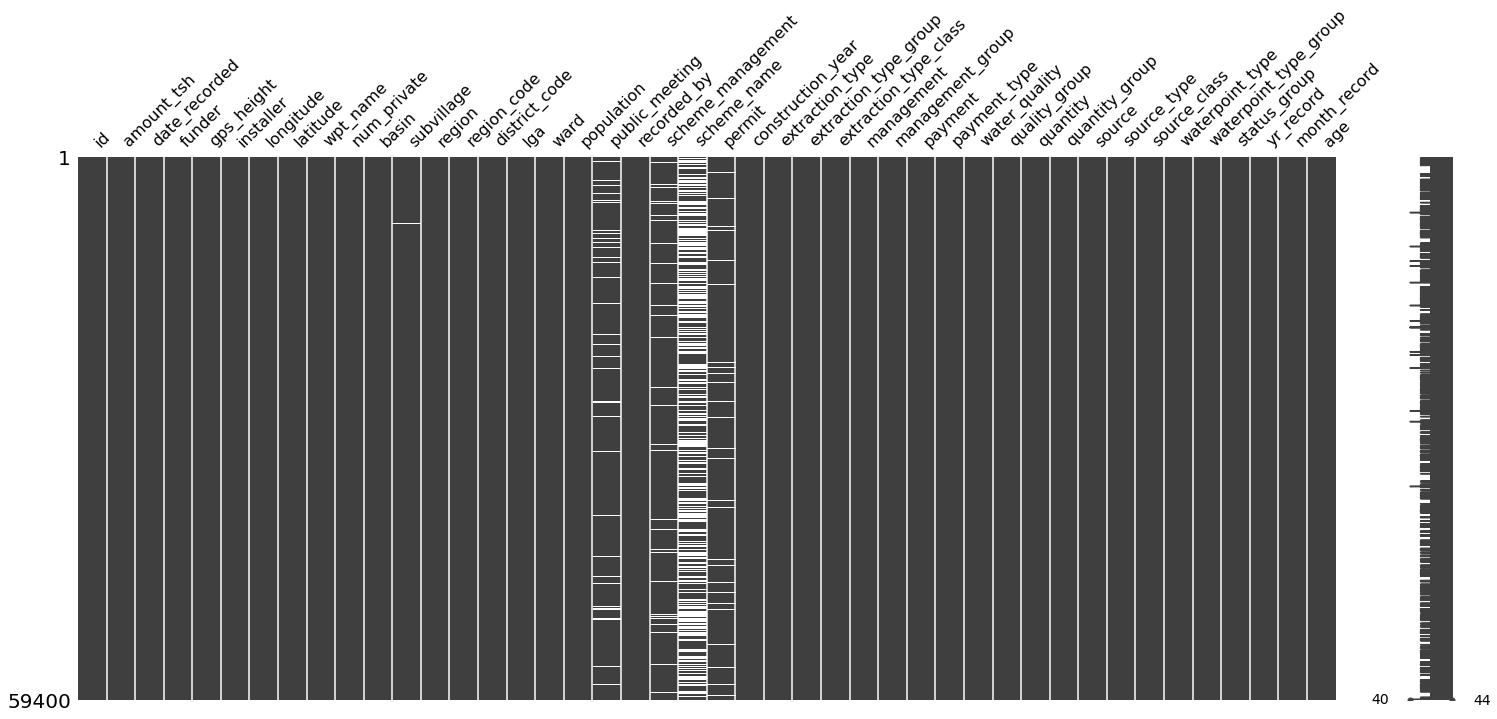

time: 806 ms (started: 2023-01-10 17:25:17 -05:00)


In [83]:
mssno.matrix(df)

<AxesSubplot:>

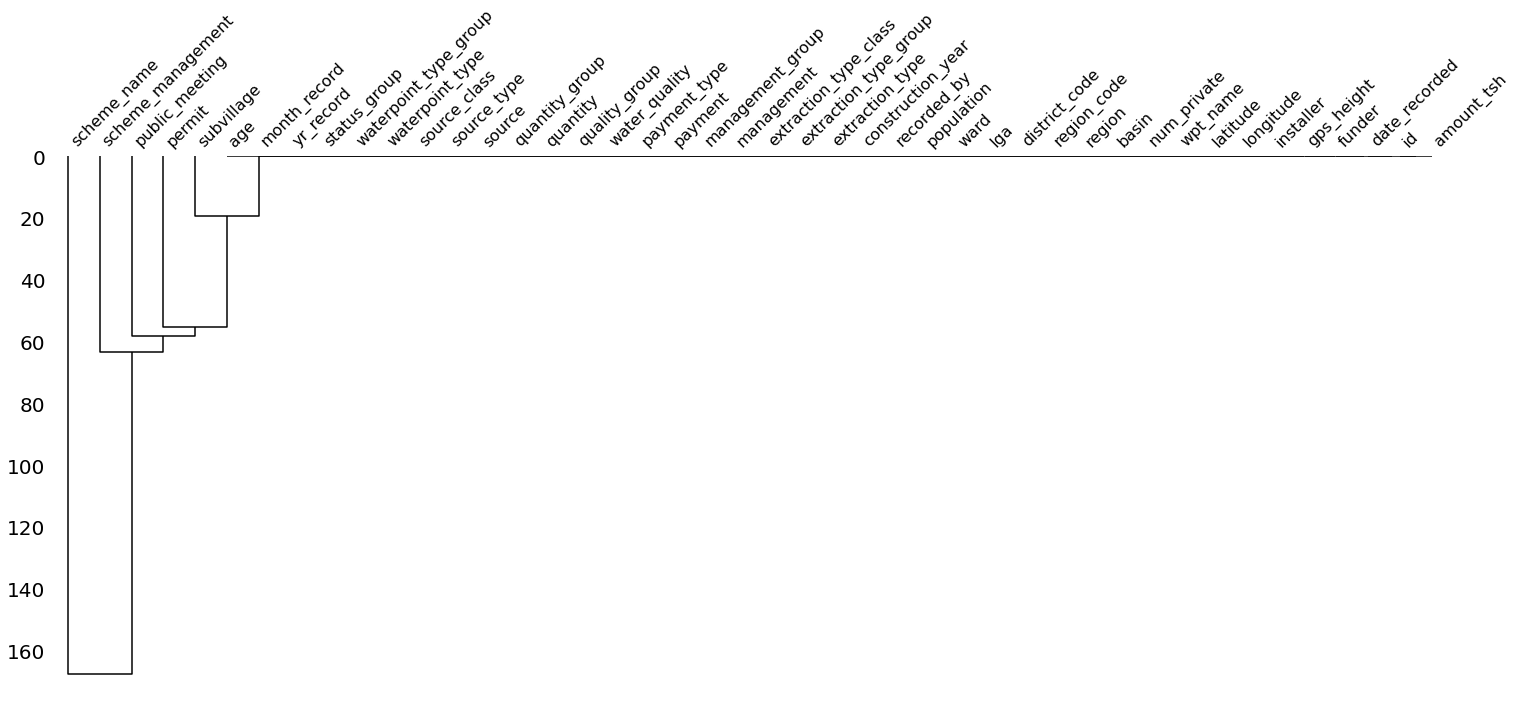

time: 626 ms (started: 2023-01-10 17:25:21 -05:00)


In [84]:
mssno.dendrogram(df)

In [85]:
nulls = ((df_clean.isnull().sum()*100) / len(df_clean)).sort_values(ascending=False)
nulls[nulls > 0]

scheme_name          47.417508
scheme_management     6.526936
public_meeting        5.612795
permit                5.144781
subvillage            0.624579
dtype: float64

time: 45.4 ms (started: 2023-01-10 17:25:24 -05:00)


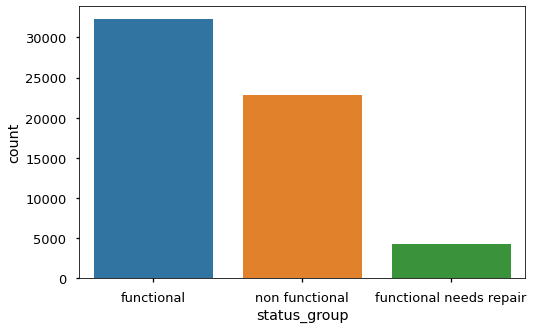

time: 101 ms (started: 2023-01-10 17:25:27 -05:00)


In [86]:
with plt.style.context('seaborn-talk'):
    fig, ax1 = plt.subplots(figsize=(8, 5))
    sns.countplot(df_ana['status_group'], ax= ax1);

In [87]:
## This is the function that can plot a given column grouped by a given category. I want to see different columns
## distribution as a function of water pumps functionality"
def get_and_plot_groups(df, col_to_study,col_to_group,ax=None, Flen=10, Fhgt=5,orient=None):
    df_new = pd.DataFrame(df[[col_to_study,col_to_group]]\
                      .groupby([col_to_study,col_to_group])\
                      .agg(({col_to_group: ['count']})))
    df_new.columns = ['_'.join(col) for col in df_new.columns.values]
    df_new   = df_new.reset_index()
    sorteddf = df_new.sort_values(df_new.columns[2], ascending=False)
    sorteddf.head()
    fig, ax = plt.subplots(figsize=(Flen,Fhgt))
    if (orient==None):
        ax      = sns.barplot(x=df_new.columns[0], y=df_new.columns[2],data=sorteddf,\
                    hue=df_new.columns[1],orient=orient)
    elif orient=='h':
        ax      = sns.barplot(x=df_new.columns[2], y=df_new.columns[0],data=sorteddf,\
                    hue=df_new.columns[1],orient='h')
    ax.legend(loc='upper right')
    #return fig, ax

time: 529 µs (started: 2023-01-10 17:25:33 -05:00)


* I am converting target feature **"status_group"** to a numeric feature that gives me flexibilty to plot bar charts by grouping a given column as a feature of this function using the function defined above. A few cells below show the distribution of different variables when grouped as a function of **status_group**

In [88]:
## I am converting target feature "status_group" to a numeric feature that gives me flexibilty
#to plot bar charts by grouping a given column as a feature of this function
dic = {'functional':0, 'non functional':1,'functional needs repair':2 }
df_ana.replace({"status_group": dic}, inplace=True)
df_ana["status_group"].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

time: 27.1 ms (started: 2023-01-10 17:25:37 -05:00)


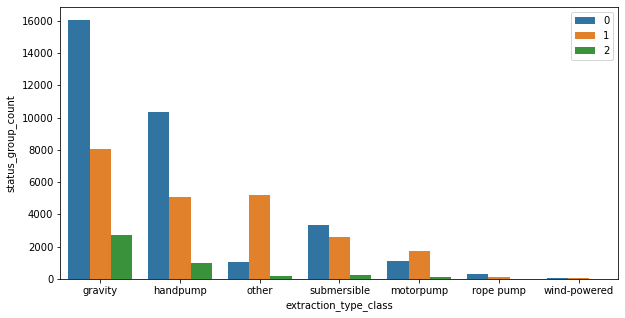

time: 185 ms (started: 2023-01-10 17:11:58 -05:00)


In [19]:
get_and_plot_groups(df_ana,'extraction_type_class','status_group',ax='ax1',Flen=10,Fhgt=5)

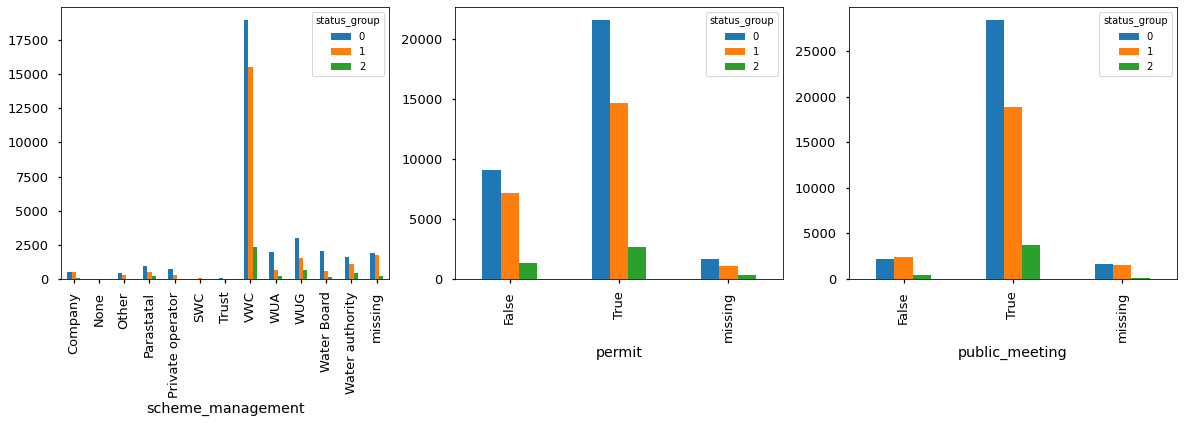

time: 438 ms (started: 2023-01-10 17:12:00 -05:00)


In [20]:
vars = ['scheme_management', 'permit', 'public_meeting']

with plt.style.context('seaborn-talk'):
    fig, ax_list = plt.subplots(ncols = 3, figsize=(20,5))  
    
for i in [0,1,2]:
    df_ana[vars[i]] = df_ana[vars[i]].fillna('missing')
    counts = df_ana[['status_group',vars[i]]].groupby(['status_group',vars[i]]).size().unstack('status_group')
    counts.plot.bar(ax=ax_list[i])
        
#get_and_plot_groups(df_ana,'public_meeting','status_group',ax='ax2',Flen=20,Fhgt=5)

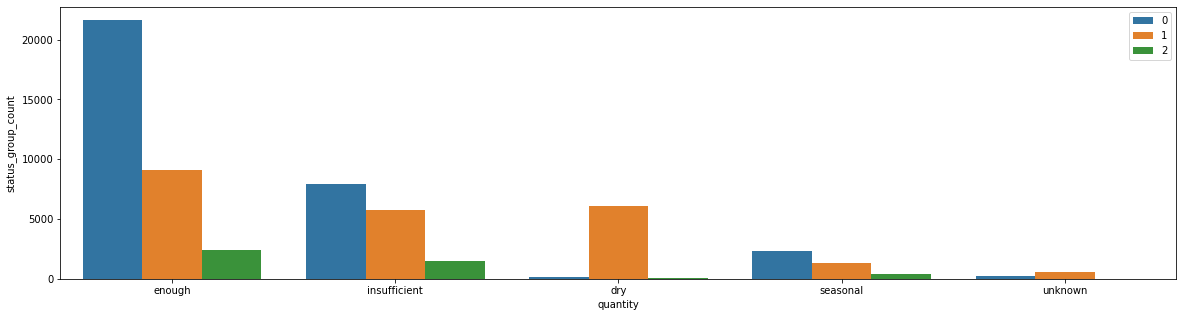

time: 144 ms (started: 2023-01-10 17:12:01 -05:00)


In [21]:
get_and_plot_groups(df_ana,'quantity','status_group',ax='ax2',Flen=20,Fhgt=5)

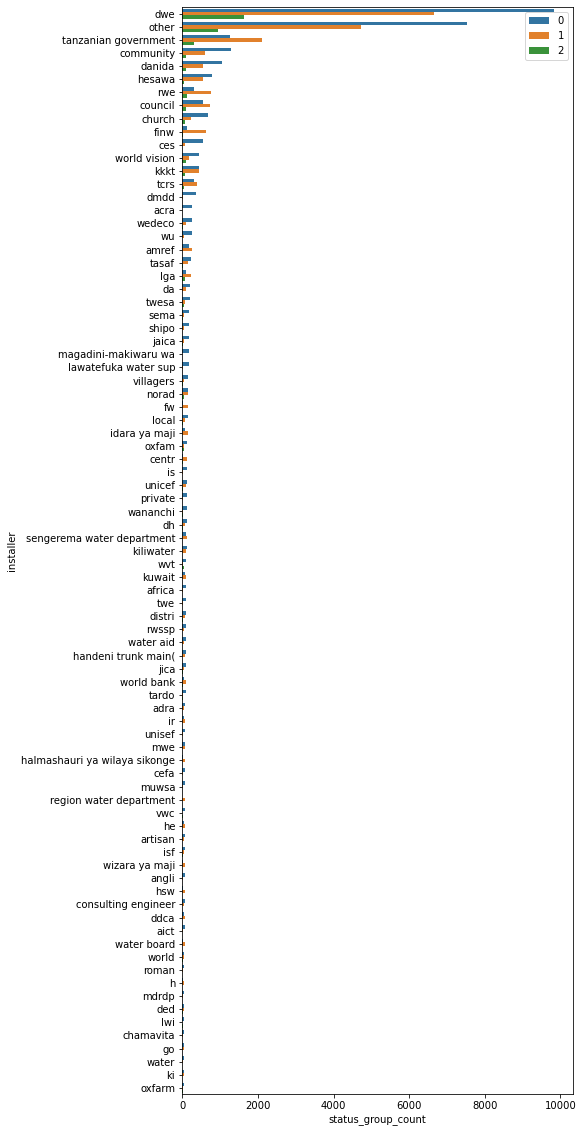

time: 1.56 s (started: 2023-01-10 17:12:02 -05:00)


In [22]:
get_and_plot_groups(df_ana,'installer','status_group',ax='ax3',Flen=7,Fhgt=20,orient="h")

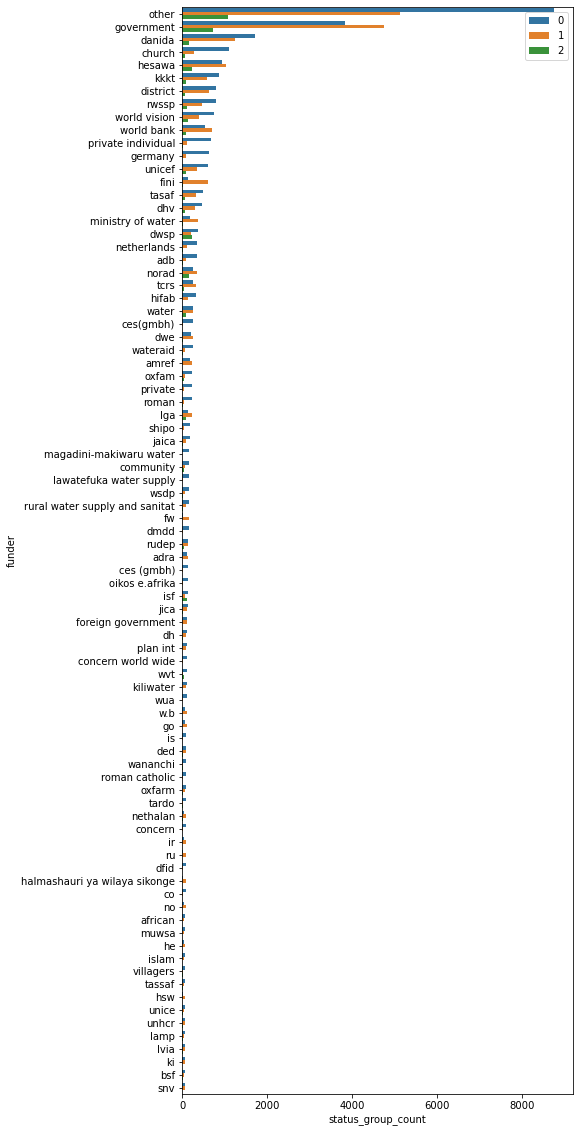

time: 1.66 s (started: 2023-01-10 17:12:03 -05:00)


In [23]:
get_and_plot_groups(df_ana,'funder','status_group',ax='ax3',Flen=7,Fhgt=20,orient="h")

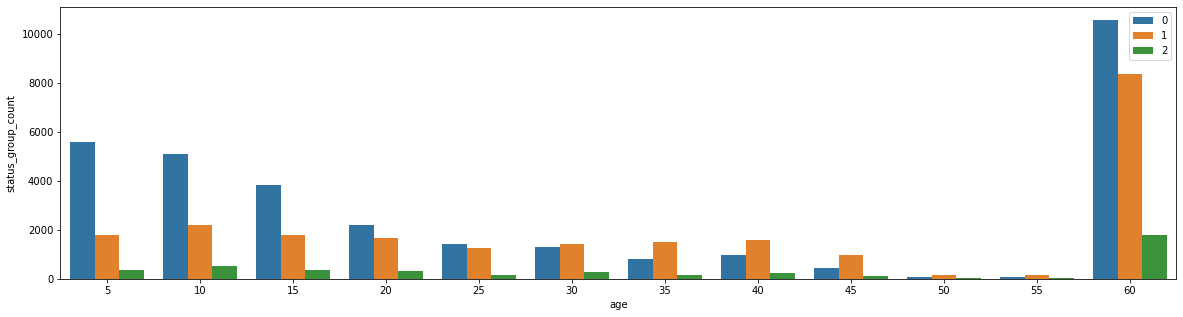

time: 227 ms (started: 2023-01-10 17:12:05 -05:00)


In [24]:
get_and_plot_groups(df_ana,'age','status_group',ax='ax2',Flen=20,Fhgt=5)

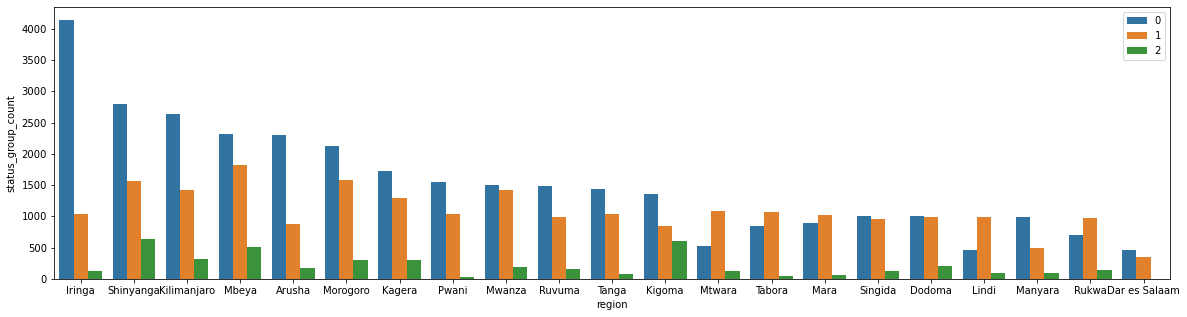

time: 329 ms (started: 2023-01-10 17:12:05 -05:00)


In [25]:
get_and_plot_groups(df_ana,'region','status_group',ax='ax2',Flen=20,Fhgt=5)

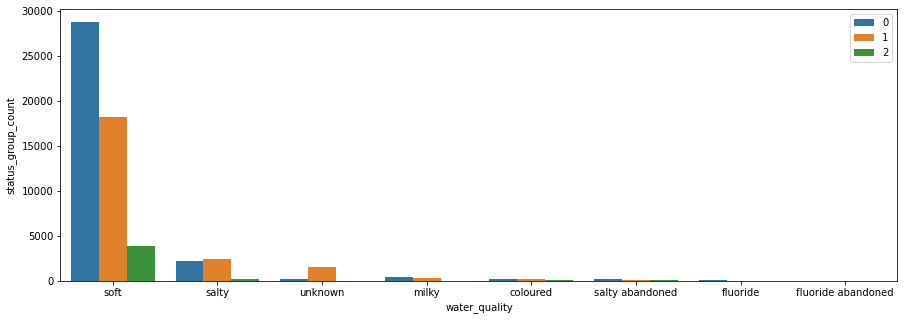

time: 248 ms (started: 2023-01-10 17:12:06 -05:00)


In [26]:
get_and_plot_groups(df_ana,'water_quality','status_group',ax='ax3',Flen=15,Fhgt=5)

In [27]:
#get_and_plot_groups(df_ana,'scheme_name','status_group',ax='ax3',Flen=15,Fhgt=5)

time: 147 µs (started: 2023-01-10 17:12:17 -05:00)


## Summary of Data Exploration

* For most of the variables, one sees that the functional wells dominate, as compared to non-functional and needs repairs categories, when looked among the most of the subgroups that the given varaiable has. One can see the trend reversal in some subgroups such as 
    * `dry_quantity" in "quantity" variable`,
    * `unknown and salty for water_quality`,
    * `tanzanian govt category in installer`
    * `age >35 yrs `


* **Missing Values** Except for the **"scheme_name"**, I dont see a lot of missing values as can be seen above from the missingno plot as well as null value counts. Since schema_name has 47% missing data, I would drop this column for now. However, I do want to include this column by defining "missing" category for those missing values. Since rest of the variables.

* The columns listed below will be deleted to build models. Most of these are deleted as they contain duplicated information as explained above in correlation plot. Installer and Funder are deleted for now because the logistic regression model based on the dataset that included these two columns showed very similar ROC/ accuracy scores as the models below without including them. 
 
    * `Train (Test) ROC scores`- **89.11(82.56)** with installer included.
    * `Train (Test) ROC scores` -**89.69% (81.81%)** model below with installer and funder removed.


* Ideally I would want to include as many as columns as I can but since categorical columns create a hige overhead, the models run slower and one needs time on the order of days to get one successful run.

* We will clean the data table by removing the columns and as above changing the status group to a numeric column

In [89]:
cols_to_delete = ['id', 'recorded_by','funder', 'installer','yr_record',
                'lga', 'ward', 'region','scheme_management',
                 'wpt_name','scheme_name', 'extraction_type_class',
                 'extraction_type_group','management', 'payment_type', 
                 'quality_group', 'source_type', 'source', 
                 'waterpoint_type_group', 'quantity_group', #'basin',
                 'num_private','construction_year','date_recorded','month_record','recorded_by']

time: 269 µs (started: 2023-01-10 17:25:45 -05:00)


In [90]:
df_clean = df_clean.drop(cols_to_delete,axis=1)

time: 10.3 ms (started: 2023-01-10 17:25:50 -05:00)


In [91]:
#df_clean=df_clean.drop('yr_record',axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
amount_tsh          59400 non-null float64
gps_height          59400 non-null int64
longitude           59400 non-null float64
latitude            59400 non-null float64
basin               59400 non-null object
subvillage          59029 non-null object
region_code         59400 non-null int64
district_code       59400 non-null int64
population          59400 non-null int64
public_meeting      56066 non-null object
permit              56344 non-null object
extraction_type     59400 non-null object
management_group    59400 non-null object
payment             59400 non-null object
water_quality       59400 non-null object
quantity            59400 non-null object
source_class        59400 non-null object
waterpoint_type     59400 non-null object
status_group        59400 non-null int64
age                 59400 non-null int64
dtypes: float64(3), int64(6), object(11)
memory usage:

In [92]:
df_clean

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region_code,district_code,population,public_meeting,permit,extraction_type,management_group,payment,water_quality,quantity,source_class,waterpoint_type,status_group,age
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,5,109,True,False,gravity,user-group,pay annually,soft,enough,groundwater,communal standpipe,0,15
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,20,2,280,NaN,True,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,0,5
2,25.0,686,37.460664,-3.821329,Pangani,Majengo,21,4,250,True,True,gravity,user-group,pay per bucket,soft,enough,surface,communal standpipe multiple,0,5
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,90,63,58,True,True,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe multiple,1,30
4,0.0,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,18,1,0,True,True,gravity,other,never pay,soft,seasonal,surface,communal standpipe,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,Pangani,Kiduruni,3,5,125,True,True,gravity,user-group,pay per bucket,soft,enough,groundwater,communal standpipe,0,15
59396,4700.0,1212,35.249991,-9.070629,Rufiji,Igumbilo,11,4,56,True,True,gravity,user-group,pay annually,soft,enough,surface,communal standpipe,0,20
59397,0.0,0,34.017087,-8.750434,Rufiji,Madungulu,12,7,0,True,False,swn 80,user-group,pay monthly,fluoride,enough,groundwater,hand pump,0,60
59398,0.0,0,35.861315,-6.378573,Rufiji,Mwinyi,1,4,0,True,True,nira/tanira,user-group,never pay,soft,insufficient,groundwater,hand pump,0,60


time: 15.4 ms (started: 2023-01-10 17:26:08 -05:00)


In [34]:
#dic = {'functional':0, 'non functional':1,'functional needs repair':2 }
#df_clean.replace({"status_group": dic}, inplace=True)
#df_clean["status_group"].value_counts()

time: 187 µs (started: 2023-01-10 17:13:08 -05:00)


In [93]:
df_clean.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['gps_height', 'region_code', 'district_code', 'population',
        'status_group', 'age'],
       dtype='object'),
 dtype('float64'): Index(['amount_tsh', 'longitude', 'latitude'], dtype='object'),
 dtype('O'): Index(['basin', 'subvillage', 'public_meeting', 'permit', 'extraction_type',
        'management_group', 'payment', 'water_quality', 'quantity',
        'source_class', 'waterpoint_type'],
       dtype='object')}

time: 3.57 ms (started: 2023-01-10 17:26:13 -05:00)


<AxesSubplot:>

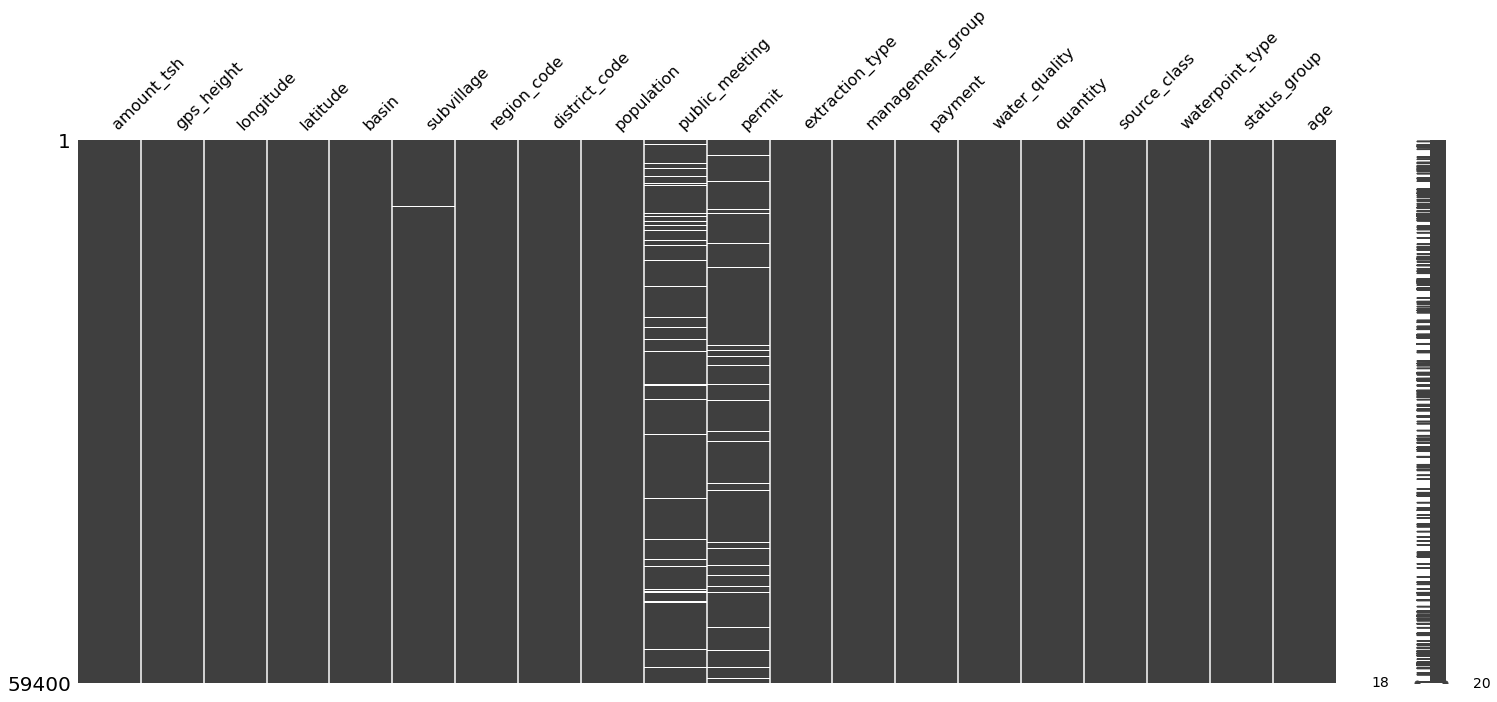

time: 403 ms (started: 2023-01-10 17:26:17 -05:00)


In [94]:
mssno.matrix(df_clean)

# Variables with the Null Values
* There are only three variables in the clean dataset that have missing values. Based on the type of these variables we will use following strategies

### Binary Columns: 
   #### `public_meeting`:`permit`:
    * These two variables are binary with values **(True/False)**
    * Given that the proportion of null values are not too high for these variables, the null values will be replaced with the **most frequent**. 

### Categorical Columns:
   #### `subvillage`: 
       * There is no intrinsinc ordering to this variables, so the null values will be replaced with a **constant('missing')** creating its own level before one-hot encoding these variables.During missing rows for 


* Splitting the variables according to their types to preprocess them before feeding them into the model

In [95]:
numeric_columns=['gps_height', 'region_code', 'district_code', 'population','amount_tsh',\
                 'longitude', 'latitude','age']
cols_cat_binary = ['public_meeting','permit']
cols_categorical = ['basin', 'subvillage', 'extraction_type',
                    'management_group', 'payment', 'water_quality', 'quantity',
                    'source_class', 'waterpoint_type']

time: 310 µs (started: 2023-01-10 17:26:21 -05:00)


###  Specify X and y:


In [96]:
X = df_clean.drop('status_group',axis=1)
y = df_clean.status_group

time: 6.2 ms (started: 2023-01-10 17:26:23 -05:00)


### Test-Train split the data:
- In order to avoid any data leakage of training data into test data, we should split the data  before applying any scaling/preprocessing techniques.

In [97]:
#Default Train and Test data split of 75 and 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,shuffle=True, stratify=y)

time: 28.7 ms (started: 2023-01-10 17:26:26 -05:00)


In [98]:
## Just a function to grab numeric values
def grab_numeric(df):
    return df.select_dtypes(exclude=[object])
GrabNumeric = FunctionTransformer(grab_numeric)

time: 272 µs (started: 2023-01-10 17:26:27 -05:00)


* Split the train data into different sub-groups based on the different data types as explained above

In [99]:
X_train_binary  = X_train[cols_cat_binary]
X_train_cat     = X_train[cols_categorical]
X_train_numeric = X_train[numeric_columns]

print("X_train shape", X_train.shape)
print("binary shape", X_train_binary.shape)
print("cateogorical shape", X_train_cat.shape)
print("numeric shape", X_train_numeric.shape)

X_train shape (44550, 19)
binary shape (44550, 2)
cateogorical shape (44550, 9)
numeric shape (44550, 8)
time: 6.31 ms (started: 2023-01-10 17:26:31 -05:00)


In [43]:
X_train_binary  = X_train[cols_cat_binary]
X_train_cat     = X_train[cols_categorical]
X_train_numeric = X_train[numeric_columns]

print("X_train shape", X_train.shape)
print("binary shape", X_train_binary.shape)
print("cateogorical shape", X_train_cat.shape)
print("numeric shape", X_train_numeric.shape)

X_train shape (44550, 19)
binary shape (44550, 2)
cateogorical shape (44550, 9)
numeric shape (44550, 8)
time: 180 ms (started: 2023-01-03 18:05:42 -05:00)


## Preprocessing Steps:

- **NA imputation** for ***binary and categorical*** variables
    * For the binary/numerical variables, impute with the ***most frequent***.
    * For the categorical variables, impute with a constant: the string ***'missing'***. 
- **One-Hot-Encoding** for the ***categorical variables*** only. 
- **Scaling** for the ***numerical variables*** only (since binary and categorical variables are already encoded as 0 and 1). 

In [100]:
preprocess_numeric = Pipeline(steps=[
    ('num', GrabNumeric),
    ('ss', StandardScaler())
])

time: 236 µs (started: 2023-01-10 17:26:37 -05:00)


In [101]:
preprocess_binary = Pipeline(steps=[
    ('binary_impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

time: 273 µs (started: 2023-01-10 17:26:39 -05:00)


In [102]:
preprocess_categorical= Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(sparse=False,handle_unknown='ignore'))
])

time: 288 µs (started: 2023-01-10 17:26:40 -05:00)


In [103]:
# This applies transformers to columns of an array or pandas DataFrame.
# This estimator allows different column subsets to be transformed separately 
# and the features generated by each transformer will be concatenated to form a single feature space.
preprocessor = ColumnTransformer(transformers=
                                 [('preprocess_binary', preprocess_binary, cols_cat_binary),
                                  ('preprocess_categorical', preprocess_categorical,cols_categorical),
                                  ('preprocess_numeric',preprocess_numeric,numeric_columns)],
                                    remainder='passthrough')#,
                           #remainder='passthrough')

time: 269 µs (started: 2023-01-10 17:26:43 -05:00)


# PREDICTING `WATER PUMP FUNCTIONALITY`:

### using `roc_auc`  and `f1_weighted` as the scoring metric :

* The target variable isimbalanced so the harmonic mean of precision and recall is more meaningful. So I will use f1_scoring as the optimizig paparameter for tuning hyperparameters for the several models.
* We care equally about positive and negative classes, being able to classify as many 0s and 1s as possible.   The Roc_Auc metric utilizes **"probabilities"** of class prediction. This is therefore a good metric to evaluate and compare the models.
* Computing Roc_Auc on train set, will tell if model is confident in it’s learning or not. 
* Computing Roc_Auc on test set will tell, how good it performed on unknown dataset - generalizability. 
* For the models comparisons, I will be using train, validation and test sets, where I will use hyper parameter tuning on the train with cross validation on validation sets, Roc_Auc based model selection and final evaluation based on test set.

# BASELINE MODEL #1 Logistic Regression:

#### This is the baseline out of box model without any hyperparamter tuning

In [104]:
baseline_logreg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("estimator", LogisticRegression(random_state=42))])#,multi_class='multinomial', solver='newton-cg'))]) # use random state so that your model results are reproducable. 

# Train model
baseline_logreg.fit(X_train, y_train);

time: 1min 5s (started: 2023-01-10 17:26:47 -05:00)


* I want to see if by default the logistric regression took into account this as a multiclassification problem

In [105]:
baseline_logreg2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("estimator", LogisticRegression(random_state=42,multi_class='multinomial'))])#,multi_class='multinomial', solver='newton-cg'))]) # use random state so that your model results are reproducable. 

# Train model
baseline_logreg2.fit(X_train, y_train);

time: 1min 5s (started: 2023-01-10 17:28:01 -05:00)


In [106]:
baseline_logreg.score(X_train, y_train)

0.7868686868686868

time: 10.7 s (started: 2023-01-10 17:29:07 -05:00)


In [107]:
baseline_logreg2.score(X_train, y_train)

0.7868686868686868

time: 7.65 s (started: 2023-01-10 17:29:18 -05:00)


In [108]:
baseline_logreg['estimator'].get_params

<bound method BaseEstimator.get_params of LogisticRegression(random_state=42)>

time: 18.3 ms (started: 2023-01-10 17:29:25 -05:00)


In [109]:
## We need this to plot ROC curves for multi classification problems
from sklearn.preprocessing import LabelBinarizer
n_classes = len(np.unique(y))
label_binarizer = LabelBinarizer().fit(y_train)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])

time: 4.31 ms (started: 2023-01-10 17:29:25 -05:00)


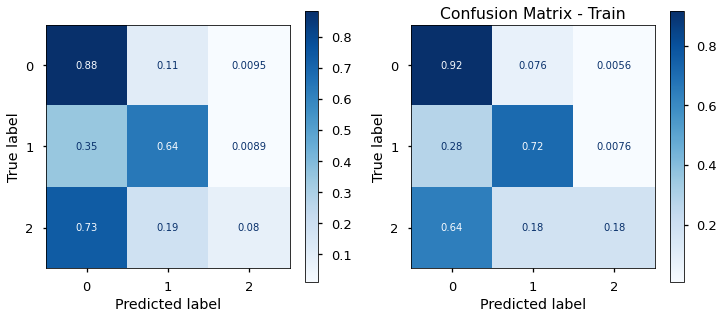



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.719     0.885     0.793      8065
           1      0.777     0.640     0.702      5706
           2      0.402     0.080     0.133      1079

    accuracy                          0.732     14850
   macro avg      0.632     0.535     0.543     14850
weighted avg      0.718     0.732     0.710     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 89.69%
 Test Roc_Auc Score: 81.81%


--------------------------------------------------------


 Train Accuracy Score: 78.69%
 Test Accuracy Score: 73.24%


--------------------------------------------------------


 Train Sensitivity/Recall score: 78.69%
 Test Sensitivity/Recall score: 73.24%


--------------------------------------

In [110]:
model_evaluation_roc_auc(baseline_logreg)

In [111]:
## This function is to plot ROC curve. Foe multi-label problem one needs to use recent sklearn package
def plot_roc_curve(model,X_test=X_test,y_test=y_test):
    y_onehot_test = label_binarizer.transform(y_test)
    y_score = model.predict_proba(X_test)
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
        )

    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {[class_id]}",
            color=color,
            ax=ax,
        )

    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
    plt.legend()

time: 2.58 ms (started: 2023-01-10 17:30:01 -05:00)


Micro-averaged One-vs-Rest ROC AUC score:
0.89
Micro-averaged One-vs-Rest ROC AUC score:
0.93


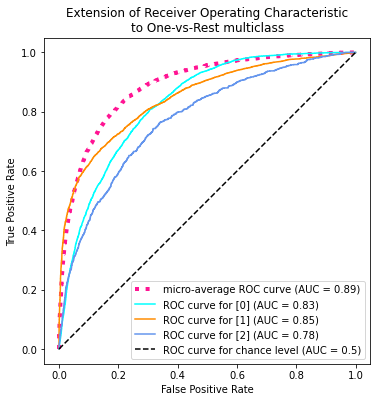

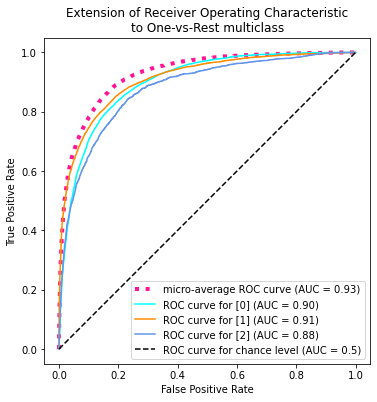

time: 10.6 s (started: 2023-01-10 17:38:46 -05:00)


In [112]:
plot_roc_curve(baseline_logreg,X_test,y_test)
plot_roc_curve(baseline_logreg,X_train,y_train)

* There is a some overfitting that the baseline model is doing. 
* We will see what hyper-paramter tuning will do in the next section

In [113]:
## This is to extract feature names from Preprocessor so that we can look at the feature importance
#for logistic regressiom
cat_features_binary=baseline_logreg['preprocessor'].transformers_[0][1]\
    ['ohe'].get_feature_names_out(X_train_binary.columns)
cat_feature_other = baseline_logreg['preprocessor'].transformers_[1][1]\
    ['ohe'].get_feature_names_out(X_train_cat.columns)
feature_names     = np.r_[cat_features_binary, cat_feature_other,X_train_numeric.columns]
#feature_names = np.r_[X_not_cat.columns, cat_feature_names]


time: 7.34 ms (started: 2023-01-10 17:39:03 -05:00)


In [114]:
# visualize feature importance from a pipeline
def feature_importance_ML(model, modelname):
    coeffs = model.named_steps['estimator'].coef_ 
    importance = pd.Series(abs(coeffs[0]), index=feature_names) # logreg_coeffs[0] = getting the one-dim list inside the list
    with plt.style.context('seaborn-talk'):
        fig, ax = plt.subplots(figsize=(10,6))
        importance.sort_values().tail(20).plot.barh(ax=ax);        
         
        ax.set_xlabel('Feature importance')
        ax.set_ylabel('Features')
        fig.tight_layout()

time: 426 µs (started: 2023-01-10 17:39:08 -05:00)


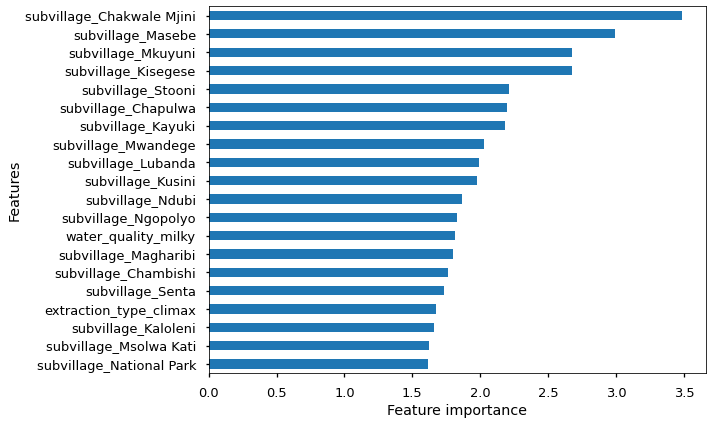

time: 194 ms (started: 2023-01-10 17:39:09 -05:00)


In [115]:
feature_importance_ML(baseline_logreg,"Log Reg")

#### Hyperparameters for Logistic Regression:
* **penalty** — Specify the norm of the penalty.
* **fit_intercept** - Specify whether to use an interceot term or not. 
* **C** — Inverse of regularization strength; smaller values specify stronger regularization.
* **solver** — Algorithm to use in the optimization problem.
* **max_iter** — Maximum number of iterations taken for the solvers to converge.

In [117]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

time: 3.59 ms (started: 2023-01-10 17:42:14 -05:00)


In [118]:
baseline_model_LR = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("estimator", LogisticRegression(random_state=42,multi_class='multinomial'))])

parameters = {
    'estimator__penalty' : ['l1','l2'], # default = l2 elasticnet is both
    'estimator__fit_intercept':[True, False],
    'estimator__C'       : [0.001,0.01,0.1,1,10,100], #np.logspace(-3,3,7) # default=1.0
    'estimator__solver'  : ['newton-cg', 'lbfgs', 'liblinear'], # default = ’lbfgs’
    'estimator__max_iter'  : [50,100]  # default = 100
}

best_model_LR = HalvingGridSearchCV(estimator = baseline_model_LR,   # model
                          param_grid = parameters,                    # hyperparameters
                          scoring ='f1_weighted',                     # metric for scoring
                          cv = 3,                                     # number of folds for cross-validation
                          n_jobs = -1                                 # 1 job per core of the computer.
)

# Train the pipeline (tranformations & predictor)
best_model_LR.fit(X_train, y_train);

time: 3h 37min 30s (started: 2023-01-10 17:42:15 -05:00)


In [119]:
def get_params_pipe_model(model):
    for param, value in model[-1].get_params(deep=True).items():
        print(f"{param} -> {value}")

time: 2.31 ms (started: 2023-01-10 21:19:46 -05:00)


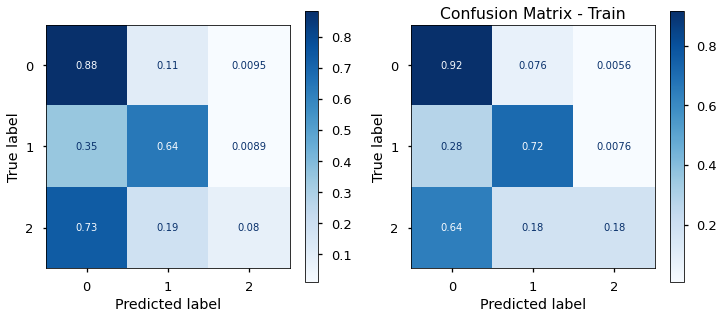



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.727     0.889     0.800      8065
           1      0.786     0.654     0.714      5706
           2      0.479     0.104     0.171      1079

    accuracy                          0.742     14850
   macro avg      0.664     0.549     0.562     14850
weighted avg      0.732     0.742     0.721     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 93.11%
 Test Roc_Auc Score: 82.77%


--------------------------------------------------------


 Train Accuracy Score: 81.70%
 Test Accuracy Score: 74.18%


--------------------------------------------------------


 Train Sensitivity/Recall score: 81.70%
 Test Sensitivity/Recall score: 74.18%


--------------------------------------

In [120]:
model_evaluation_roc_auc(best_model_LR)

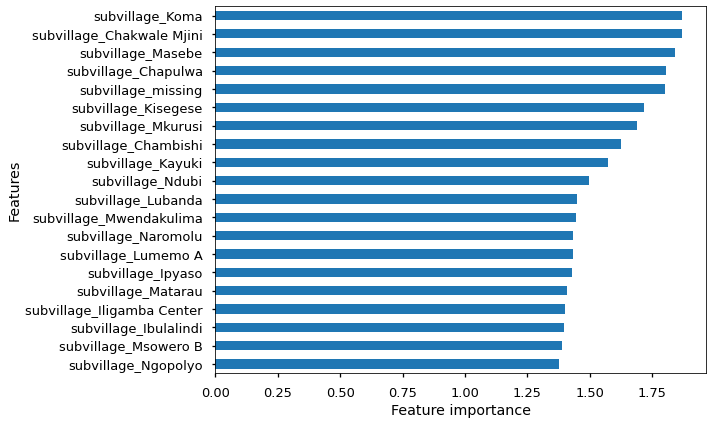

time: 269 ms (started: 2023-01-10 21:20:27 -05:00)


In [121]:
feature_importance_ML(best_model_LR.best_estimator_,"Log Regression")

# BASELINE MODEL #2 Random Forest Classifier:

In [115]:
rfc = RandomForestClassifier(random_state=42,class_weight = 'balanced')

rfc_model_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("estimator",rfc)
])
rfc_model_pipe.fit(X_train, y_train);

time: 4min 18s (started: 2023-01-04 19:55:02 -05:00)


In [187]:
 rfc_model_pipe['estimator'].get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', random_state=42)>

time: 1.57 ms (started: 2023-01-06 12:24:05 -05:00)


In [203]:
rfc2 = RandomForestClassifier(random_state=42,class_weight = 'balanced',
                            min_samples_leaf=2,max_features='log2')

rfc_model_pipe2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("estimator",rfc2)
])
rfc_model_pipe2.fit(X_train, y_train);

time: 36.3 s (started: 2023-01-06 13:03:39 -05:00)


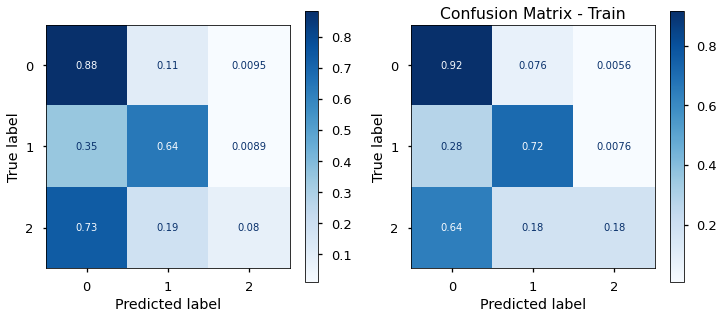



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.743     0.595     0.661      8065
           1      0.655     0.606     0.629      5706
           2      0.172     0.496     0.255      1079

    accuracy                          0.592     14850
   macro avg      0.523     0.566     0.515     14850
weighted avg      0.668     0.592     0.619     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 78.91%
 Test Roc_Auc Score: 75.87%


--------------------------------------------------------


 Train Accuracy Score: 61.26%
 Test Accuracy Score: 59.21%


--------------------------------------------------------


 Train Sensitivity/Recall score: 61.26%
 Test Sensitivity/Recall score: 59.21%


--------------------------------------

In [204]:
model_evaluation_roc_auc(rfc_model_pipe2)

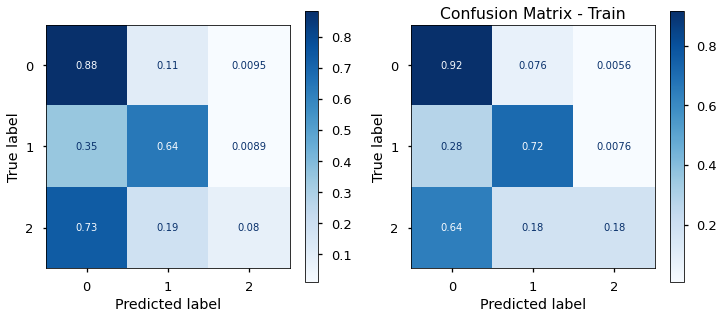



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.799     0.891     0.842      8065
           1      0.841     0.771     0.804      5706
           2      0.536     0.307     0.390      1079

    accuracy                          0.803     14850
   macro avg      0.725     0.656     0.679     14850
weighted avg      0.796     0.803     0.795     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 99.99%
 Test Roc_Auc Score: 88.81%


--------------------------------------------------------


 Train Accuracy Score: 99.92%
 Test Accuracy Score: 80.26%


--------------------------------------------------------


 Train Sensitivity/Recall score: 99.92%
 Test Sensitivity/Recall score: 80.26%


--------------------------------------

In [117]:
model_evaluation_roc_auc(rfc_model_pipe)

Micro-averaged One-vs-Rest ROC AUC score:
0.86
Micro-averaged One-vs-Rest ROC AUC score:
0.84


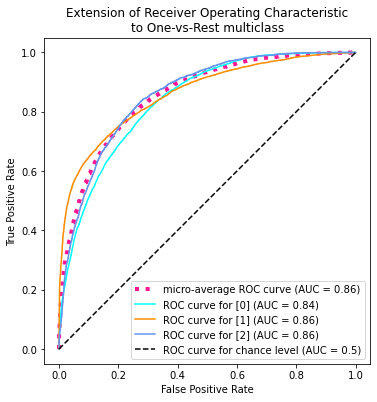

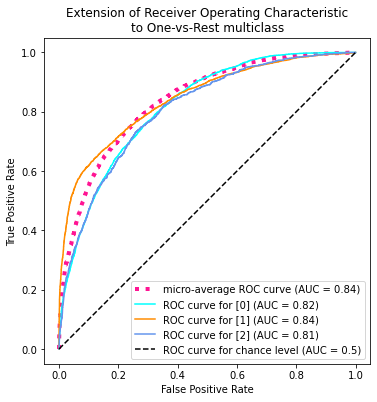

time: 15.6 s (started: 2023-01-06 12:32:01 -05:00)


In [191]:
plot_roc_curve(rfc_model_pipe2,X_train,y_train)
plot_roc_curve(rfc_model_pipe2,X_test,y_test)

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Micro-averaged One-vs-Rest ROC AUC score:
0.93


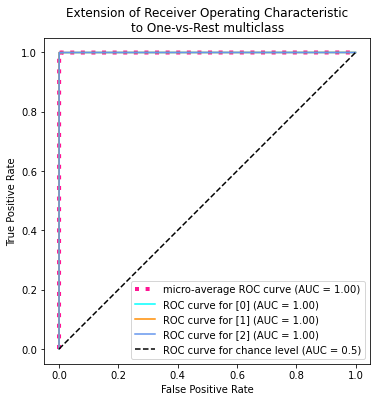

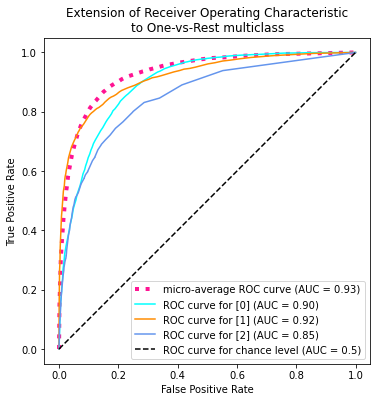

time: 17 s (started: 2023-01-04 20:48:07 -05:00)


In [125]:
plot_roc_curve(rfc_model_pipe,X_train,y_train)
plot_roc_curve(rfc_model_pipe,X_test,y_test)

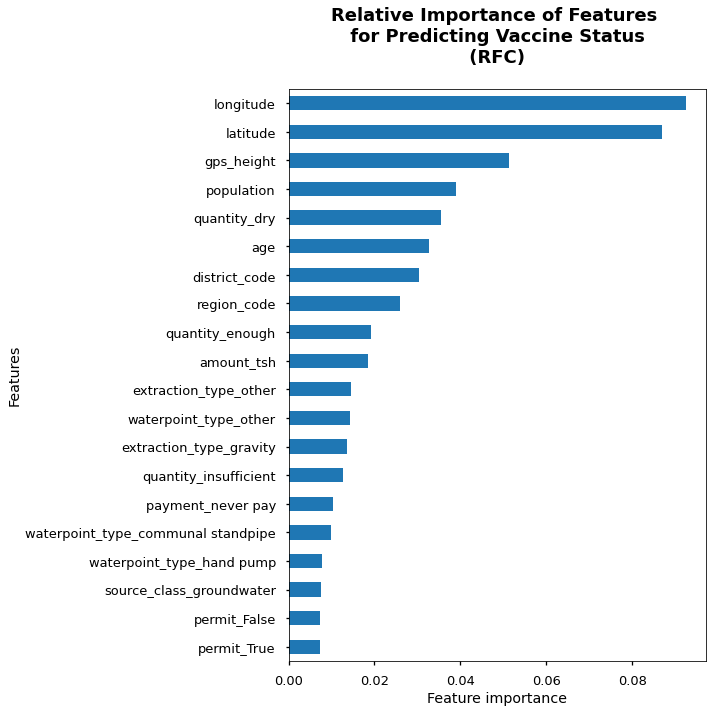

time: 239 ms (started: 2023-01-04 21:00:45 -05:00)


In [150]:
feature_importance_XGB(rfc_model_pipe,"RFC")

### Baseline model is overfitting:
* The baseline model is clearly overfitting: the model picks up on patterns that are specific to the observations in the training data, but do not generalize to other observations. 
* The model is able to make perfect predictions on the data it was trained on (roc_auc = 99.99), but is not able to make good predictictions on test data (roc_auc = 89.8).
* Playing with the hyperparameters fixed the overfitting issue but resulted in a roc_auc score of 78% and 75% on training and test data respectively.
* We will see how the hyperparamrter tuning will affect the model performance

# BASELINE MODEL #3 XGBoost:

* XGBoost is a more regularized form of Gradient Boosting. 
* XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. 
* XGBoost delivers high performance as compared to Gradient Boosting. 
* Its training is very fast and can be parallelized across clusters.
### Baseline Model:

In [119]:
clf = XGBClassifier()
xgb_model_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("estimator",clf)
])
xgb_model_pipe.fit(X_train, y_train);

time: 34min 25s (started: 2023-01-04 20:03:15 -05:00)


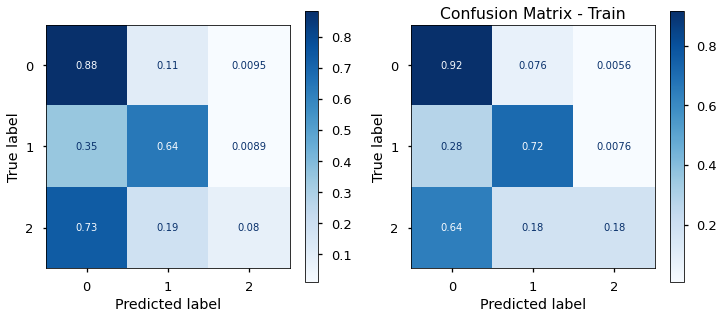



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.751     0.922     0.828      8065
           1      0.846     0.687     0.758      5706
           2      0.647     0.194     0.298      1079

    accuracy                          0.779     14850
   macro avg      0.748     0.601     0.628     14850
weighted avg      0.780     0.779     0.763     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 91.25%
 Test Roc_Auc Score: 87.58%


--------------------------------------------------------


 Train Accuracy Score: 80.40%
 Test Accuracy Score: 77.87%


--------------------------------------------------------


 Train Sensitivity/Recall score: 80.40%
 Test Sensitivity/Recall score: 77.87%


--------------------------------------

In [124]:
model_evaluation_roc_auc(xgb_model_pipe)

Micro-averaged One-vs-Rest ROC AUC score:
0.94
Micro-averaged One-vs-Rest ROC AUC score:
0.92


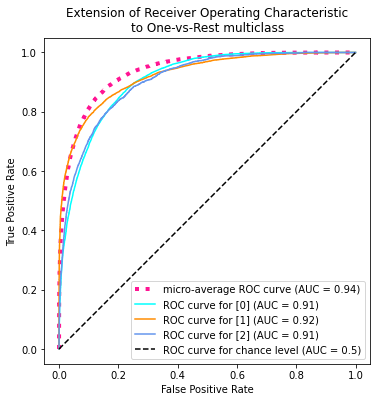

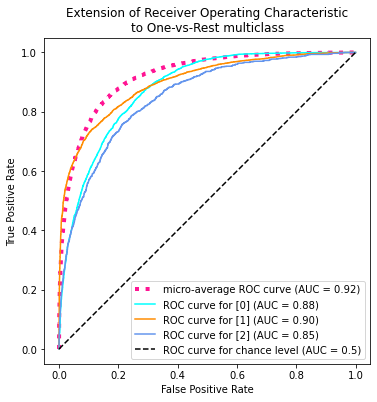

time: 11.3 s (started: 2023-01-04 20:48:51 -05:00)


In [126]:
plot_roc_curve(xgb_model_pipe,X_train,y_train)
plot_roc_curve(xgb_model_pipe,X_test,y_test)

In [285]:
# function to plot feature importance of XGB model
def feature_importance_XGB(model, modelname):
    feature_importances = model.named_steps['estimator'].feature_importances_
    importance = pd.Series(feature_importances, index=feature_names) # always positive value?
    with plt.style.context('seaborn-talk'):
        fig, ax = plt.subplots(figsize=(10,10))
        importance.sort_values().tail(20).plot.barh(ax=ax);
        ax.set_title("Relative Importance of Features \n for Predicting Water Pump Status \n ({}) \n".format(modelname), fontsize=18, fontweight='bold') 
        ax.set_xlabel('Feature importance')
        ax.set_ylabel('Features')
        plt.tight_layout()

time: 477 µs (started: 2023-01-09 08:39:38 -05:00)


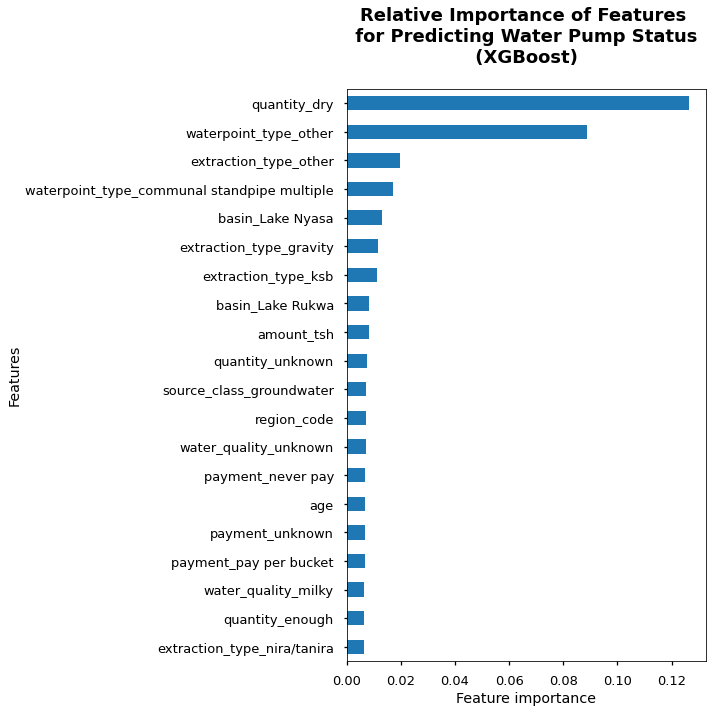

time: 258 ms (started: 2023-01-09 08:39:42 -05:00)


In [286]:
feature_importance_XGB(xgb_model_pipe, "XGBoost")

### Baseline model is overfitting again:
* The baseline model is doing **GOOD**
* The model is making good predictions on both the train(roc_auc = 96), but is not able to make the same predictions when 5-fold cross validated data was used (roc_auc = .85) or on test data (roc_auc = .86).

# Hyperparameter Tuning for Random Forests and XGB Models

#### Hyperparameters for Random Forests :
* **criterion** — Specify the norm of the penalty.
* **max_depth** - The maximum depth of the tree, most important feature to avoid overfitting. If it is not specified in the Decision Tree, the nodes will be expanded until all leaf nodes are pure. The deeper you allow, the more complex our model will become and more likely to overfit. 
* **max_features** — Max_feature is the number of features to consider (randomly chosen) each time to make the split decision. It is used to control overfitting. 
* **min_samples_split** — The minimum number of samples required to split an internal node.
* **min_samples_leaf** — The minimum number of samples required to be at a leaf node. Try setting these values greater than one. This has a similar effect as max_depth, it means the branch will stop splitting once the leaves have that number of samples each.
* **n_estimators**: The more trees, the less likely the RF algorithm is to overfit. 

In [226]:
# Baseline model preprocessed and fit to a Random Forest Classifier
baseline_model_RF = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", RandomForestClassifier(random_state=42, class_weight = "balanced"))
])

# Hyperparameters used for model tuning
parameters = {
    'estimator__n_estimators': [150],                 # default=100 Number of trees.
    'estimator__criterion': ['entropy', 'gini'],      # default = gini
    'estimator__max_depth': [5, 7,9],                   # default = None, Lower depth prevents overfitting
    'estimator__max_features': ['sqrt', 'log'],             # default = None (n_features), Lower values prevent overfitting  
    'estimator__min_samples_split': [5, 10,20],      # default = 2, Higher values prevent overfitting 
    'estimator__min_samples_leaf': [2, 4,6]          # default = 1, Higher values prevent overfitting 
}   

# Create the grid, with "baseline_RF_insurance" as the estimator
#best_model_RF = GridSearchCV(estimator = baseline_model_RF,   # model
#                          param_grid = parameters,                    # hyperparameters
#                          scoring ='f1_weighted',                     # metric for scoring
#                          cv = 3,                                     # number of folds for cross-validation
#                          n_jobs = -1                                 # 1 job per core of the computer.
#)                      
best_model_RF = HalvingGridSearchCV(estimator = baseline_model_RF,   # model
                          param_grid = parameters,                    # hyperparameters
                          scoring ='f1_weighted',                     # metric for scoring
                          cv = 3,                                     # number of folds for cross-validation
                          n_jobs = -1                                 # 1 job per core of the computer.
)       

# Train the pipeline (tranformations & predictor)
best_model_RF.fit(X_train, y_train);

time: 5min 15s (started: 2023-01-06 13:35:05 -05:00)


In [228]:
best_model_RF.best_estimator_[-1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

time: 2.06 ms (started: 2023-01-06 13:42:50 -05:00)


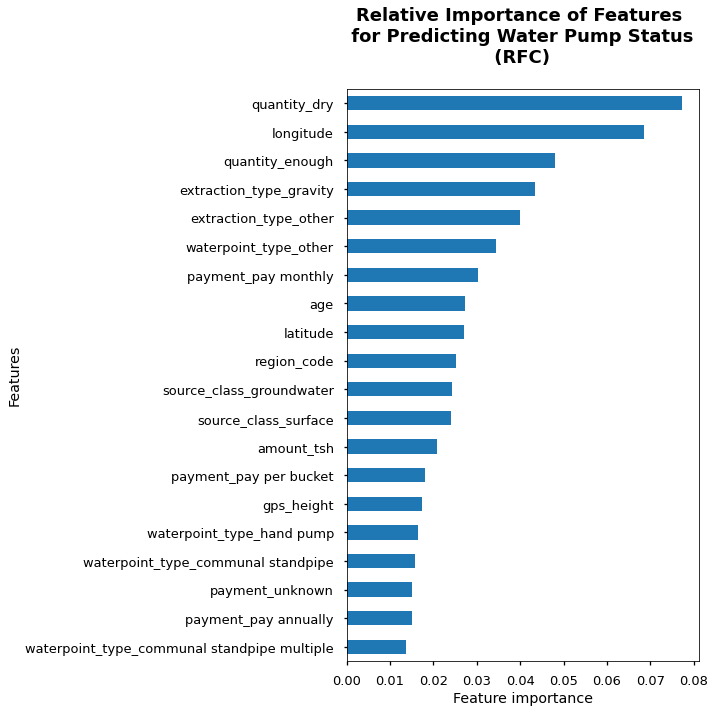

time: 258 ms (started: 2023-01-09 08:39:57 -05:00)


In [287]:
feature_importance_XGB(best_model_RF.best_estimator_,"RFC")

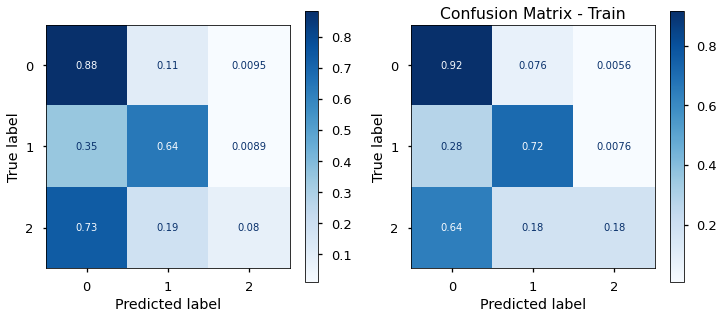



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.749     0.656     0.700      8065
           1      0.716     0.617     0.663      5706
           2      0.191     0.510     0.278      1079

    accuracy                          0.630     14850
   macro avg      0.552     0.594     0.547     14850
weighted avg      0.696     0.630     0.655     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 79.58%
 Test Roc_Auc Score: 78.25%


--------------------------------------------------------


 Train Accuracy Score: 63.90%
 Test Accuracy Score: 63.02%


--------------------------------------------------------


 Train Sensitivity/Recall score: 63.90%
 Test Sensitivity/Recall score: 63.02%


--------------------------------------

In [230]:
model_evaluation_roc_auc(best_model_RF.best_estimator_)

In [239]:
best_model_LR.best_params_

{'estimator__C': 1,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 50,
 'estimator__penalty': 'l2',
 'estimator__solver': 'newton-cg'}

time: 2.76 ms (started: 2023-01-06 18:03:34 -05:00)


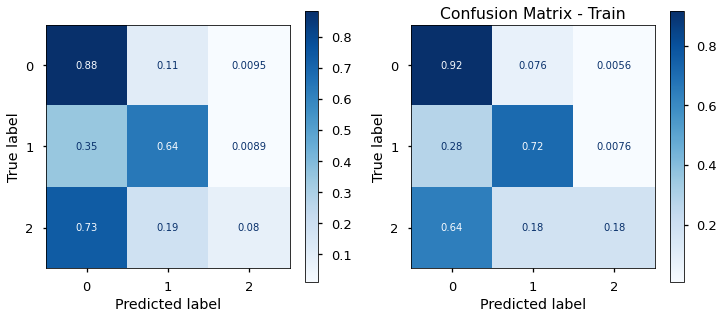



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.727     0.889     0.800      8065
           1      0.786     0.654     0.714      5706
           2      0.479     0.104     0.171      1079

    accuracy                          0.742     14850
   macro avg      0.664     0.549     0.562     14850
weighted avg      0.732     0.742     0.721     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 93.11%
 Test Roc_Auc Score: 82.77%


--------------------------------------------------------


 Train Accuracy Score: 81.70%
 Test Accuracy Score: 74.19%


--------------------------------------------------------


 Train Sensitivity/Recall score: 81.70%
 Test Sensitivity/Recall score: 74.19%


--------------------------------------

In [241]:
model_evaluation_roc_auc(best_model_LR)

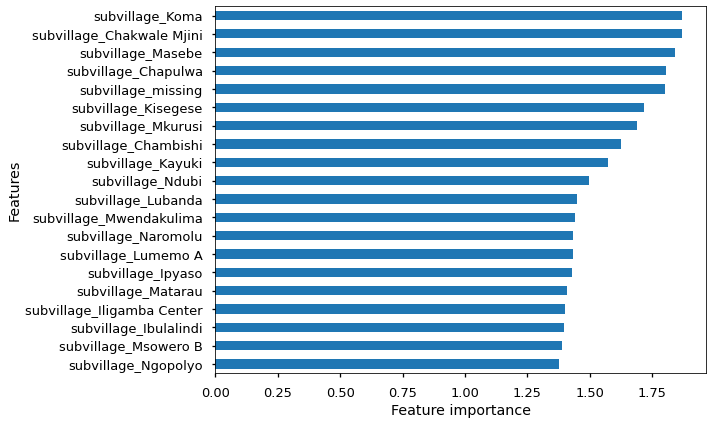

time: 206 ms (started: 2023-01-06 18:53:31 -05:00)


In [243]:
feature_importance_ML(best_model_LR.best_estimator_,"Log REg")

In [196]:
get_params_pipe_model(baseline_logreg)

C -> 1.0
class_weight -> None
dual -> False
fit_intercept -> True
intercept_scaling -> 1
l1_ratio -> None
max_iter -> 100
multi_class -> auto
n_jobs -> None
penalty -> l2
random_state -> 42
solver -> lbfgs
tol -> 0.0001
verbose -> 0
warm_start -> False
time: 605 µs (started: 2023-01-06 12:37:13 -05:00)


In [197]:
get_params_pipe_model(rfc_model_pipe)

bootstrap -> True
ccp_alpha -> 0.0
class_weight -> balanced
criterion -> gini
max_depth -> None
max_features -> sqrt
max_leaf_nodes -> None
max_samples -> None
min_impurity_decrease -> 0.0
min_samples_leaf -> 1
min_samples_split -> 2
min_weight_fraction_leaf -> 0.0
n_estimators -> 100
n_jobs -> None
oob_score -> False
random_state -> 42
verbose -> 0
warm_start -> False
time: 478 µs (started: 2023-01-06 12:37:28 -05:00)


In [205]:
get_params_pipe_model(xgb_model_pipe)

objective -> multi:softprob
use_label_encoder -> None
base_score -> 0.5
booster -> gbtree
callbacks -> None
colsample_bylevel -> 1
colsample_bynode -> 1
colsample_bytree -> 1
early_stopping_rounds -> None
enable_categorical -> False
eval_metric -> None
feature_types -> None
gamma -> 0
gpu_id -> -1
grow_policy -> depthwise
importance_type -> None
interaction_constraints -> 
learning_rate -> 0.300000012
max_bin -> 256
max_cat_threshold -> 64
max_cat_to_onehot -> 4
max_delta_step -> 0
max_depth -> 6
max_leaves -> 0
min_child_weight -> 1
missing -> nan
monotone_constraints -> ()
n_estimators -> 100
n_jobs -> 0
num_parallel_tree -> 1
predictor -> auto
random_state -> 0
reg_alpha -> 0
reg_lambda -> 1
sampling_method -> uniform
scale_pos_weight -> None
subsample -> 1
tree_method -> exact
validate_parameters -> 1
verbosity -> None
time: 34.9 ms (started: 2023-01-06 13:05:48 -05:00)


## Hyperparameter Tuning:

#### Hyperparameters for XG Boost Classifier :

- `n_estimators`: Training more trees in a Random Forest reduces the likelihood of overfitting, but training more trees with GBTs **increases** the likelihood of overfitting. To avoid overfitting use **fewer trees**.
- `learning_rate`: If you reduce the learning rate in your XGBoost model, your model will also be less likely to overfit. This will act as a regularization technique that prevents your model from paying too much attention to an unimportant feature. Models that are highly complex with many parameters tend to overfit more than models that are small and simple.
- `max_depth`: The deeper you allow, the more complex our model will become and more likely to overfit.
- `gamma`: The minimum loss reduction required to make a further split; Larger values avoid over-fitting
- `min_child_weight`: The minimum number of instances needed in a node. Larger values avoid over-fitting.
- `subsample`: The ratio of the training instances used (i.e. rows used). Lower ratios avoid over-fitting.
- `colsample_bytree`: The ratio of features used (i.e. columns used). Lower ratios avoid over-fitting.

In [122]:
baseline_model_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("estimator", XGBClassifier(random_state=42))])

parameters = {
    "estimator__n_estimators": [75],              # default = 100, To avoid overfitting use "fewer" trees unlike RF.
    "estimator__learning_rate": [0.05, 0.2], # default = 0.3, Lower ratios avoid over-fitting. If you reduce the learning rate in your XGBoost model, your model will also be less likely to overfit. 
    "estimator__max_depth": [4, 6],            # default = 6, It is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    'estimator__gamma': [0.5, 1],                 # default = 0 , Larger values avoid over-fitting.
    'estimator__min_child_weight': [3, 4, 5],     # default = 1, Larger values avoid over-fitting. The larger min_child_weight is, the more conservative the algorithm will be. 
    'estimator__subsample': [0.5, 0.75],          # default = 1, Lower ratios avoid over-fitting.
    'estimator__colsample_bytree':[0.5, 0.75]     # default = 1, Lower ratios avoid over-fitting.
}

best_model_xgb = HalvingGridSearchCV(estimator = baseline_model_xgb,       
                        param_grid = parameters,     
                        scoring ='f1_weighted',          
                        cv = 3,
                        n_jobs = -1
)                      

# Train the pipeline (tranformations & predictor)ui0
best_model_xgb.fit(X_train, y_train);

time: 3h 16min 53s (started: 2023-01-10 21:43:39 -05:00)


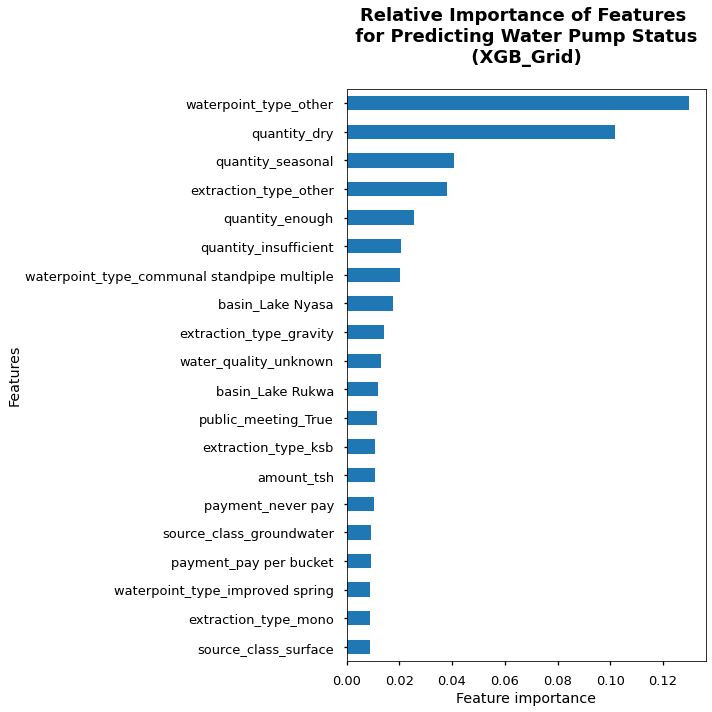

time: 213 ms (started: 2023-01-09 08:40:10 -05:00)


In [288]:
feature_importance_XGB(best_model_xgb.best_estimator_,"XGB_Grid")

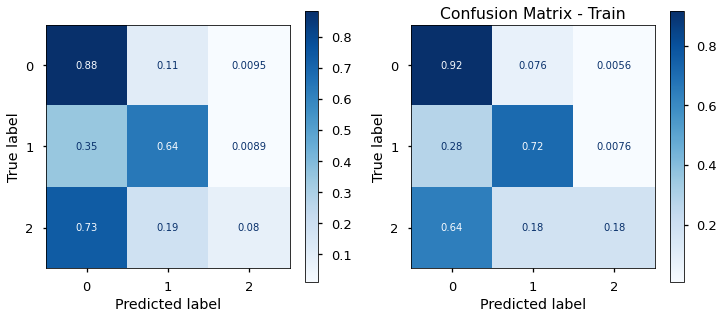



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.751     0.922     0.828      8065
           1      0.840     0.684     0.754      5706
           2      0.649     0.185     0.288      1079

    accuracy                          0.777     14850
   macro avg      0.747     0.597     0.623     14850
weighted avg      0.778     0.777     0.760     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 90.59%
 Test Roc_Auc Score: 87.75%


--------------------------------------------------------


 Train Accuracy Score: 79.58%
 Test Accuracy Score: 77.70%


--------------------------------------------------------


 Train Sensitivity/Recall score: 79.58%
 Test Sensitivity/Recall score: 77.70%


--------------------------------------

In [248]:
model_evaluation_roc_auc(best_model_xgb)

Micro-averaged One-vs-Rest ROC AUC score:
0.93
Micro-averaged One-vs-Rest ROC AUC score:
0.92


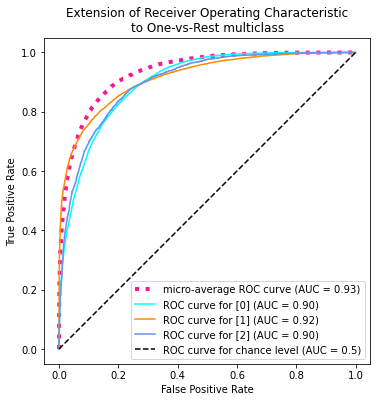

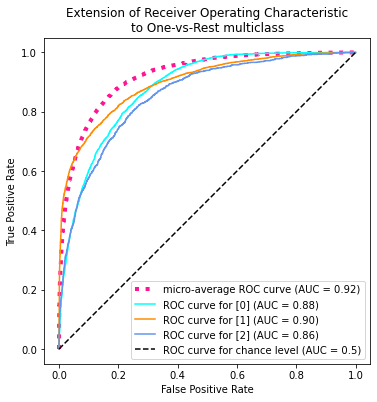

time: 10.4 s (started: 2023-01-06 22:29:41 -05:00)


In [250]:
plot_roc_curve(best_model_xgb,X_train,y_train)
plot_roc_curve(best_model_xgb,X_test,y_test)

In [252]:
best_model_xgb.best_estimator_.named_steps['estimator']

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.75,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

time: 5.78 ms (started: 2023-01-07 08:20:58 -05:00)


In [251]:
best_model_LR.best_estimator_.named_steps['estimator']

LogisticRegression(C=1, max_iter=50, multi_class='multinomial', random_state=42,
                   solver='newton-cg')

time: 2.56 ms (started: 2023-01-07 08:10:48 -05:00)


In [253]:
best_model_RF.best_estimator_.named_steps['estimator']

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

time: 3.14 ms (started: 2023-01-07 08:21:21 -05:00)


In [255]:
from sklearn.ensemble import StackingClassifier

time: 577 µs (started: 2023-01-07 08:22:01 -05:00)


# Model #4:  Stacked Model:

* Let's build a stacked model using the three best models obtained above

In [256]:
# Meta learner is XGBClassifier and the base learners are Random Forest, Logistic Regression and XGBoost 
# Stacking often considers heterogeneous weak learners, learns them in parallel, and combines them by training a meta-learner to output a prediction based on the different weak learner’s predictions. 

base_learners = [
                ('logreg', best_model_LR.best_estimator_.named_steps['estimator']),
                ('RF', best_model_RF.best_estimator_.named_steps['estimator']),   # uses bagging (another ensemble technique)
                ('XGB', best_model_xgb.best_estimator_.named_steps['estimator'])  # uses boosting (another ensemble technique)
                ]

ensemble = StackingClassifier(estimators=base_learners, 
                              final_estimator = XGBClassifier(), 
                              cv=3, 
                              passthrough=False, 
                              n_jobs=-1)

stacked_model = Pipeline([
        ("preprocessor", preprocessor),
        ('ensemble',ensemble)
])

stacked_model.fit(X_train, y_train);

time: 7h 4min 39s (started: 2023-01-07 08:22:02 -05:00)


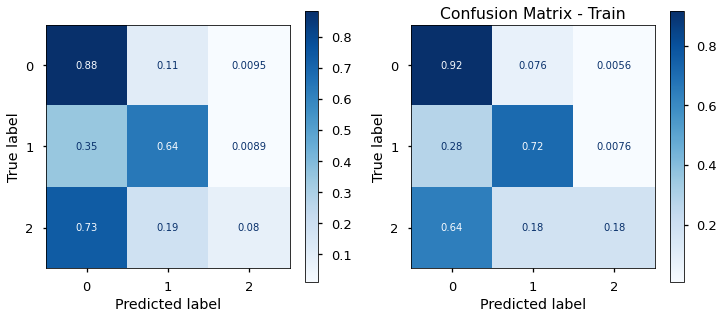



--------------------------------------------------------
Classification Report - Test:
--------------------------------------------------------
              precision    recall  f1-score   support

           0      0.763     0.902     0.827      8065
           1      0.827     0.708     0.763      5706
           2      0.580     0.234     0.334      1079

    accuracy                          0.779     14850
   macro avg      0.723     0.615     0.641     14850
weighted avg      0.774     0.779     0.766     14850

--------------------------------------------------------
--------------------------------------------------------


 Train Roc_Auc Score: 92.13%
 Test Roc_Auc Score: 87.53%


--------------------------------------------------------


 Train Accuracy Score: 81.85%
 Test Accuracy Score: 77.88%


--------------------------------------------------------


 Train Sensitivity/Recall score: 81.85%
 Test Sensitivity/Recall score: 77.88%


--------------------------------------

In [257]:
model_evaluation_roc_auc(stacked_model)

In [412]:
#stacked_model.named_steps

time: 181 µs (started: 2023-01-10 11:22:26 -05:00)


In [273]:
roc_auc_score(y_train, best_model_RF.predict_proba(X_train),multi_class='ovr') 

0.7958285574635743

time: 8.59 s (started: 2023-01-07 19:24:53 -05:00)


In [274]:
roc_auc_score(y_train, best_model_LR.predict_proba(X_train),multi_class='ovr') 

0.9311001881605073

time: 6.78 s (started: 2023-01-07 19:25:34 -05:00)


In [275]:
roc_auc_score(y_train, best_model_xgb.predict_proba(X_train),multi_class='ovr') 

0.9058720284867391

time: 7.87 s (started: 2023-01-07 19:25:43 -05:00)


In [276]:
roc_auc_score(y_train, stacked_model.predict_proba(X_train),multi_class='ovr') 

0.9213306260104325

time: 11.2 s (started: 2023-01-07 19:25:52 -05:00)


# Summary of Models

In [277]:
def compare_roc_auc(names, models):

    cv_roc_auc_scores = []
    train_roc_auc_scores = []
    test_roc_auc_scores = []

    for i in range(len(names)):
        score_train_cv = cross_val_score(estimator=models[i], X=X_train,  y=y_train,
                                         cv=StratifiedKFold(shuffle=True), scoring='roc_auc_ovr').mean()
        
        score_train = roc_auc_score(y_train, models[i].predict_proba(X_train),multi_class='ovr') 
        score_test = roc_auc_score(y_test, models[i].predict_proba(X_test),multi_class='ovr')
        
        cv_roc_auc_scores.append(score_train_cv)
        train_roc_auc_scores.append(score_train)
        test_roc_auc_scores.append(score_test)
        
    scores_table = pd.DataFrame(list(zip(cv_roc_auc_scores, train_roc_auc_scores, test_roc_auc_scores)),
                             columns =['cv_train', 'train', 'test'], index = names)
    return(scores_table)


time: 1.53 ms (started: 2023-01-07 19:26:08 -05:00)


In [264]:
cross_val_score(best_model_LR.best_estimator_,X=X_train,  y=y_train,cv=StratifiedKFold(shuffle=True), scoring='roc_auc_ovr').mean()

0.8255891375564793

time: 37min 33s (started: 2023-01-07 16:31:06 -05:00)


In [279]:
names = ["Logistic Regression", "Random_Forest", "XG Boost"]#, "Stacked Model"]
models = [best_model_LR.best_estimator_, 
          best_model_RF.best_estimator_, best_model_xgb.best_estimator_]#, stacked_model]

df_scores=compare_roc_auc(names, models)

time: 1h 26min 7s (started: 2023-01-08 10:52:27 -05:00)


In [280]:
df_scores

,cv_train,train,test
Logistic Regression,0.827096,0.931100,0.827683
Random_Forest,0.780599,0.795829,0.782454
XG Boost,0.877268,0.905872,0.877508


time: 12.9 ms (started: 2023-01-08 14:11:11 -05:00)


In [ ]:
from sklearn.feature_selection import SelectFromModel


In [281]:
score_train_cv_stacked = cross_val_score(estimator=stacked_model, X=X_train,  y=y_train,
                                         cv=StratifiedKFold(shuffle=True), scoring='roc_auc_ovr').mean()
score_train_stacked = roc_auc_score(y_train, stacked_model.predict_proba(X_train),multi_class='ovr') 
score_test_stacked  = roc_auc_score(y_test, stacked_model.predict_proba(X_test),multi_class='ovr')
print(score_train_cv_stacked,score_train_stacked,score_test_stacked)

0.8725677860247358 0.9213306260104325 0.8752554146270765
time: 13h 8min 35s (started: 2023-01-08 14:40:21 -05:00)


In [282]:
new_row = {'cv_train':score_train_cv_stacked, 'train':score_train_stacked, 'test':score_test_stacked}
dfscores = df_scores.append(pd.DataFrame([new_row],index=['Stacked'],columns=df_scores.columns))
print(dfscores)

                     cv_train     train      test
Logistic Regression  0.827096  0.931100  0.827683
Random_Forest        0.780599  0.795829  0.782454
XG Boost             0.877268  0.905872  0.877508
Stacked              0.872568  0.921331  0.875255
time: 7.07 ms (started: 2023-01-09 08:38:21 -05:00)


In [283]:
dfscores

,cv_train,train,test
Logistic Regression,0.827096,0.931100,0.827683
Random_Forest,0.780599,0.795829,0.782454
XG Boost,0.877268,0.905872,0.877508
Stacked,0.872568,0.921331,0.875255


time: 4.51 ms (started: 2023-01-09 08:38:29 -05:00)


 # Summary of Model Comparisons:

* With the exception of Logistic Regression, the train and test scores for the rest of the models are all close to one another, implying that there is no overfitting 
* Both Roc_Auc and Accuracy Scores are considered **GOOD** for all the models. 
* **XGBoost** is the best performing model followed by the Stacked model.

## Overall comparison of different ML techniques:

In [358]:
def plot_roc_curve2(model,X_test=X_test,y_test=y_test,ax=ax,name='name',color='red'):
    y_onehot_test = label_binarizer.transform(y_test)
    y_score = model.predict_proba(X_test)
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = round(auc(fpr["micro"], tpr["micro"]),2)

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
    #fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(
        fpr["micro"],
        tpr["micro"],
        #label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color=color,
        linestyle=":",
        linewidth=4,label=name+" AUC="+str(roc_auc['micro'])
        )

    #for class_id, color in zip(range(n_classes), colors):
    #    RocCurveDisplay.from_predictions(
    #        y_onehot_test[:, class_id],
    #        y_score[:, class_id],
    #        #name=f"ROC curve for {[class_id]}",
    #        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    #        color=color,
    #        ax=ax,
    #    )
    return ax

time: 1.07 ms (started: 2023-01-10 10:16:41 -05:00)


Micro-averaged One-vs-Rest ROC AUC score:
0.89
Micro-averaged One-vs-Rest ROC AUC score:
0.95
Micro-averaged One-vs-Rest ROC AUC score:
0.80
Micro-averaged One-vs-Rest ROC AUC score:
0.81
Micro-averaged One-vs-Rest ROC AUC score:
0.92
Micro-averaged One-vs-Rest ROC AUC score:
0.93
Micro-averaged One-vs-Rest ROC AUC score:
0.92
Micro-averaged One-vs-Rest ROC AUC score:
0.95


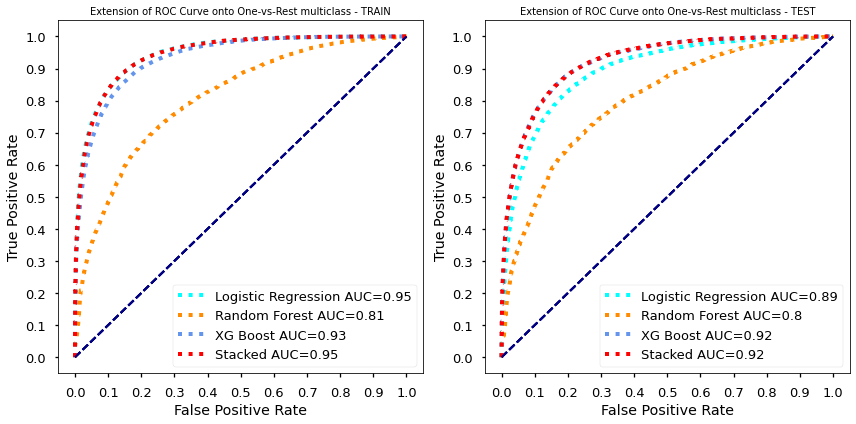

time: 58.2 s (started: 2023-01-10 10:20:16 -05:00)


In [361]:
with plt.style.context('seaborn-talk'): #seaborn-whitegrid
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols =2, figsize=(12, 6))
    
    names = ["Logistic Regression", "Random Forest", "XG Boost", "Stacked"]
    models = [best_model_LR.best_estimator_, best_model_RF.best_estimator_, 
              best_model_xgb.best_estimator_,stacked_model]
    colors2 = ["aqua", "darkorange", "cornflowerblue",'red']
    for i in range(len(names)):
        ax2 = plot_roc_curve2(models[i],X_test,y_test,ax2, names[i],colors2[i])
        ax1=plot_roc_curve2(models[i],X_train,y_train,ax1,names[i],colors2[i])
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-0.05, 1.05])
        ax1.set_yticks([i/10.0 for i in range(11)])
        ax1.set_xticks([i/10.0 for i in range(11)])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title('Extension of ROC Curve onto One-vs-Rest multiclass - TRAIN',fontsize=10)
        ax1.legend()
        ax1.grid() 
        
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax2.set_xlim([-0.05, 1.05])
        ax2.set_ylim([-0.05, 1.05])
        ax2.set_yticks([i/10.0 for i in range(11)])
        ax2.set_xticks([i/10.0 for i in range(11)])
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('Extension of ROC Curve onto One-vs-Rest multiclass - TEST',fontsize=10)
        ax2.legend()
        ax2.grid()
        plt.tight_layout()

### Compare Feature Importances from the best 2 models:
* I haven't figured how to plot feature_importance from stacked model yet!


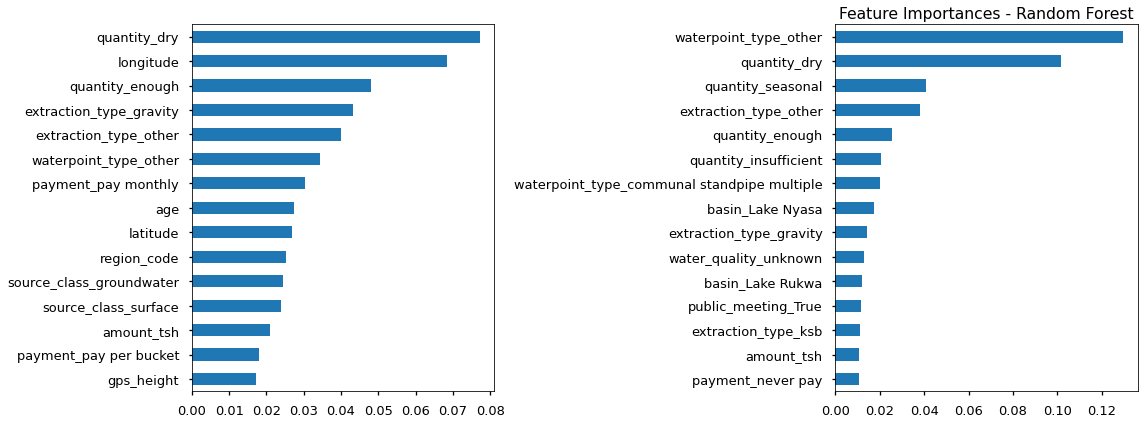

time: 357 ms (started: 2023-01-10 11:24:27 -05:00)


In [413]:
with plt.style.context('seaborn-talk'):
    fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(16,6)) 
    
    #coeffs = best_logreg.best_estimator_.named_steps['estimator'].coef_ 
    #importance = pd.Series(abs(coeffs[0]), index=feature_names)
    #importance.sort_values().tail(15).plot.barh(ax=ax1);
    #ax1.set_title("Feature Importances - Logistic Regression")
    
    feature_importances = best_model_RF.best_estimator_.named_steps['estimator'].feature_importances_
    importance = pd.Series(feature_importances, index=feature_names)
    importance.sort_values().tail(15).plot.barh(ax=ax1);
    ax2.set_title("Feature Importances - Random Forest")
    
    feature_importances = best_model_xgb.best_estimator_.named_steps['estimator'].feature_importances_
    importance = pd.Series(feature_importances, index=feature_names)
    importance.sort_values().tail(15).plot.barh(ax=ax2);
    ax3.set_title("Feature Importances - XGBoost")
    
    #feature_importances = stacked_model.named_steps['ensemble'].final_estimator.feature_importances_
    #importance = pd.Series(feature_importances, index=feature_names)
    #importance.sort_values().tail(15).plot.barh(ax=ax3);
    #ax3.set_title("Feature Importances - Stacked Model")
    
    fig.tight_layout();

In [402]:
#steps=stacked_model.named_steps['ensemble']#.final_estimator.

time: 263 µs (started: 2023-01-10 10:52:33 -05:00)


In [507]:
stacked_model.named_steps['ensemble'].final_estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

time: 3.43 ms (started: 2023-01-10 14:37:42 -05:00)


In [508]:
importance.sort_values().tail(10)

water_quality_unknown                          0.013044
extraction_type_gravity                        0.014077
basin_Lake Nyasa                               0.017523
waterpoint_type_communal standpipe multiple    0.020127
quantity_insufficient                          0.020469
quantity_enough                                0.025437
extraction_type_other                          0.038027
quantity_seasonal                              0.040926
quantity_dry                                   0.101654
waterpoint_type_other                          0.129657
dtype: float32

time: 3.38 ms (started: 2023-01-10 14:37:45 -05:00)


In [514]:
final_model_train =best_model_xgb.best_estimator_
final_model_train.fit(X_train,y_train)
#feature_importances
#importance = pd.Series(feature_importances, index=feature_names) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess_binary',
                                                  Pipeline(steps=[('binary_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['public_meeting', 'permit']),
                                                 ('preprocess_categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_v...
                               feature_types=None, gamma=1, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=3,
                               missing=nan, monotone_constraints='()',
                               n_estimators=75, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

time: 20min 17s (started: 2023-01-10 14:42:26 -05:00)


In [ ]:
feature_importances = final_model_train.feature_importances_
importance = pd.Series(feature_importances, index=feature_names) 


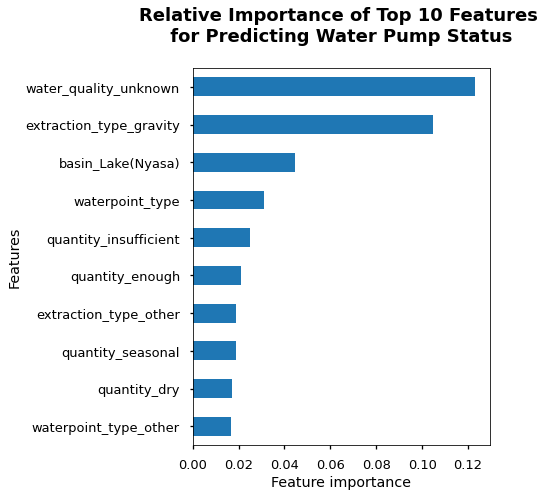

time: 417 ms (started: 2023-01-11 06:44:33 -05:00)


In [124]:
# Plot only the most important 10 features for the presentation:

feature_importances = best_model_xgb.best_estimator_.named_steps['estimator'].feature_importances_
importance = pd.Series(feature_importances, index=feature_names) 

with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(7,7))
    importance.sort_values().tail(10).plot.barh(ax=ax);
    ax.set_title("Relative Importance of Top 10 Features \n for Predicting Water Pump Status \n", fontsize=18, fontweight='bold') 
    ax.set_xlabel('Feature importance')
    ax.set_ylabel('Features')
    ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels(['waterpoint_type_other','quantity_dry','quantity_seasonal','extraction_type_other',\
                      'quantity_enough','quantity_insufficient','waterpoint_type','basin_Lake(Nyasa)',\
                      'extraction_type_gravity','water_quality_unknown'])
    plt.tight_layout()
    plt.savefig("./images/FeatureImportances_top10.png", dpi=300, bbox_inches='tight')
        

In [126]:
def props(dataframe, column, target): 
    counts = dataframe[[column,target]].groupby([column, target]).size().unstack(target)
    props = counts[[0,1,2]].multiply(100).div(counts.sum(axis=1), axis=0)  
    return props.sort_values(by = 1)

time: 695 µs (started: 2023-01-11 06:45:04 -05:00)


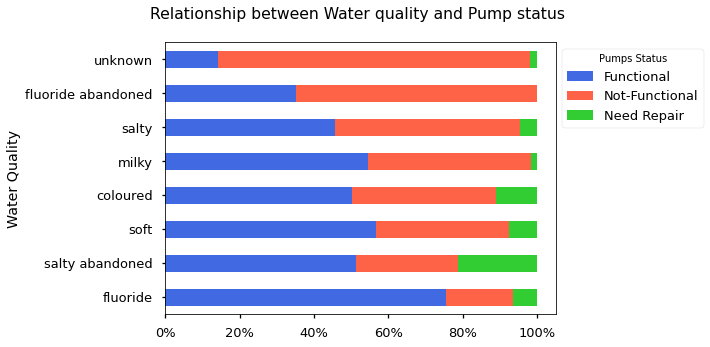

time: 459 ms (started: 2023-01-11 08:26:14 -05:00)


In [148]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(7, 5))
    props(df_ana,"water_quality","status_group").plot.barh(stacked=True, color = ['royalblue','tomato','limegreen'], ax=ax)
    ax.legend(bbox_to_anchor=(1, 1), labels = ['Functional', 'Not-Functional', 'Need Repair'], title='Pumps Status')
    ax.set_ylabel("Water Quality")
    #ax.set_yticks([0,1])
    #ax.set_yticklabels(["No", "YES"])
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%')) 
    ax.set_title("Relationship between Water quality and Pump status \n")
    plt.savefig('./images/Relationship_quality_pump.png', dpi=300, bbox_inches='tight')

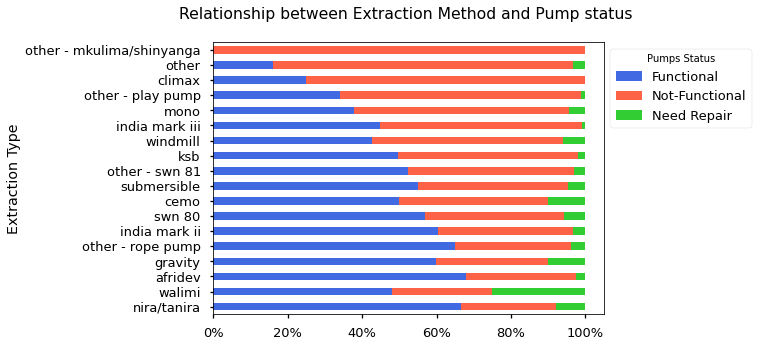

time: 624 ms (started: 2023-01-11 08:26:18 -05:00)


In [149]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(7, 5))
    props(df_ana,"extraction_type","status_group").plot.barh(stacked=True, color = ['royalblue','tomato','limegreen'], ax=ax)
    ax.legend(bbox_to_anchor=(1, 1), labels = ['Functional', 'Not-Functional', 'Need Repair'], title='Pumps Status')
    ax.set_ylabel("Extraction Type")
    #ax.set_yticks([0,1])
    #ax.set_yticklabels(["No", "YES"])
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%')) 
    ax.set_title("Relationship between Extraction Method and Pump status \n")
    plt.savefig('./images/Relationship_extraction_pump.png', dpi=300, bbox_inches='tight')

In [150]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(7, 5))
    props(df_ana,"basin","status_group").plot.barh(stacked=True, color = ['royalblue',,'tomato','limegreen'], ax=ax)
    ax.legend(bbox_to_anchor=(1, 1), labels = ['Functional', 'Not-Functional', 'Need Repair'], title='Pumps Status')
    ax.set_ylabel("Basin")
    #ax.set_yticks([0,1])
    #ax.set_yticklabels(["No", "YES"])
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%')) 
    ax.set_title("Relationship Basin and Pump status \n")
    plt.savefig('./images/Relationship_basin_pump.png', dpi=300, bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-150-4878e0c80e92>, line 3)

time: 1.24 ms (started: 2023-01-11 08:26:19 -05:00)


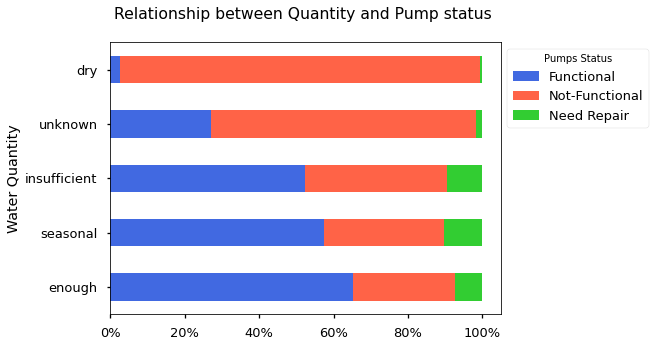

time: 404 ms (started: 2023-01-11 08:47:45 -05:00)


In [153]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(7, 5))
    props(df_ana,"quantity","status_group").plot.barh(stacked=True, color = ['royalblue','tomato','limegreen'], ax=ax)
    ax.legend(bbox_to_anchor=(1, 1), labels = ['Functional', 'Not-Functional', 'Need Repair'], title='Pumps Status')
    ax.set_ylabel("Water Quantity")
    #ax.set_yticks([0,1])
    #ax.set_yticklabels(["No", "YES"])
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%')) 
    ax.set_title("Relationship between Quantity and Pump status \n")
    plt.savefig('./images/Relationship_quantity_pump.png', dpi=300, bbox_inches='tight')

In [435]:
#counts = df_ana.groupby(['water_quality','status_group']).size().unstack(['status_group'])
#props = counts[[0,1,2]].multiply(100).div(counts.sum(axis=1), axis=0) 
#props.sort_values(by = 1)

status_group,0,1,2
water_quality,,,
fluoride,75.500000,18.000000,6.500000
salty abandoned,51.327434,27.433628,21.238938
soft,56.594120,35.723563,7.682317
coloured,50.204082,38.775510,11.020408
milky,54.477612,43.781095,1.741294
salty,45.716639,49.649918,4.633443
fluoride abandoned,35.294118,64.705882,NaN
unknown,14.072495,84.061834,1.865672


time: 10.4 ms (started: 2023-01-10 11:46:05 -05:00)


In [434]:
props
#df_ana.groupby(['water_quality','status_group']).size().unstack()

status_group,0,1,2
water_quality,,,
coloured,50.204082,38.775510,11.020408
fluoride,75.500000,18.000000,6.500000
fluoride abandoned,35.294118,64.705882,NaN
milky,54.477612,43.781095,1.741294
salty,45.716639,49.649918,4.633443
salty abandoned,51.327434,27.433628,21.238938
soft,56.594120,35.723563,7.682317
unknown,14.072495,84.061834,1.865672


time: 3.96 ms (started: 2023-01-10 11:45:22 -05:00)


In [442]:
##ax = df_ana.groupby(['water_quality','status_group']).sum().unstack(['status_group'])\
#.plot(kind='bar', stacked=True, figsize=(15,6))

#df_ana.groupby(['water_quality','status_group']).plot.barh(stacked=True, color = ['tomato','royalblue'], ax=ax

time: 172 µs (started: 2023-01-10 11:53:55 -05:00)


## Generate Predicted Probabliities for the entire DATASET

* Lets see how the predicted probablity distributions look for the dataset using our best model. We will fit the best **XGB Classifier** to the whole dataset or this

In [128]:
final_model =best_model_xgb.best_estimator_

time: 230 µs (started: 2023-01-11 06:46:05 -05:00)


In [453]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess_binary',
                                                  Pipeline(steps=[('binary_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['public_meeting', 'permit']),
                                                 ('preprocess_categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_v...
                               feature_types=None, gamma=1, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=3,
                               missing=nan, monotone_constraints='()',
                               n_estimators=75, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

time: 80.2 ms (started: 2023-01-10 12:24:53 -05:00)


* Lets set X1 and y1 to the whole dataset

In [129]:
X1 = X
y1 = y
final_model.fit(X1,y1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess_binary',
                                                  Pipeline(steps=[('binary_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['public_meeting', 'permit']),
                                                 ('preprocess_categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_v...
                               feature_types=None, gamma=1, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=4,
                               missing=nan, monotone_constraints='()',
                               n_estimators=75, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

time: 26min 35s (started: 2023-01-11 06:46:28 -05:00)


In [130]:
y_data_pred = final_model.predict_proba(X1)

time: 16.6 s (started: 2023-01-11 07:37:55 -05:00)


In [131]:
# Create new columns corresponding to target classes "Functiona", Non-Functional", and "Need Repairs"
#with the respective predicted probabilities. 
X1['Pump_functioning_pred'] = y_data_pred[:,0]
X1['Pump_Notfunctioning_pred'] = y_data_pred[:,1]
X1['Pump_NeedRepairs_pred'] = y_data_pred[:,2]
df_predicted= X1
#New data set with the predicted probabilities added:
df_predicted.head()

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region_code,district_code,population,public_meeting,...,management_group,payment,water_quality,quantity,source_class,waterpoint_type,age,Pump_functioning_pred,Pump_Notfunctioning_pred,Pump_NeedRepairs_pred
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,5,109,True,...,user-group,pay annually,soft,enough,groundwater,communal standpipe,15,0.970261,0.015927,0.013813
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,20,2,280,NaN,...,user-group,never pay,soft,insufficient,surface,communal standpipe,5,0.693837,0.216910,0.089252
2,25.0,686,37.460664,-3.821329,Pangani,Majengo,21,4,250,True,...,user-group,pay per bucket,soft,enough,surface,communal standpipe multiple,5,0.800658,0.150847,0.048495
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,90,63,58,True,...,user-group,never pay,soft,dry,groundwater,communal standpipe multiple,30,0.010911,0.987799,0.001290
4,0.0,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,18,1,0,True,...,other,never pay,soft,seasonal,surface,communal standpipe,60,0.725396,0.154972,0.119632


time: 58.3 ms (started: 2023-01-11 07:39:02 -05:00)


In [137]:
## A function that will plot the probabilites
def probability_plot(data, column, target, ax,color='color'):
    (data.groupby(column)[target].mean()*100).plot.bar(np.hstack(target), ax= ax, color = color)
    ax.set_ylabel("Predicted Probability")
    ax.set_yticks(range(0,110,10))
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%')) 

time: 374 µs (started: 2023-01-11 07:42:18 -05:00)


* Plot the Predicted probablities for "Need Repairs" class

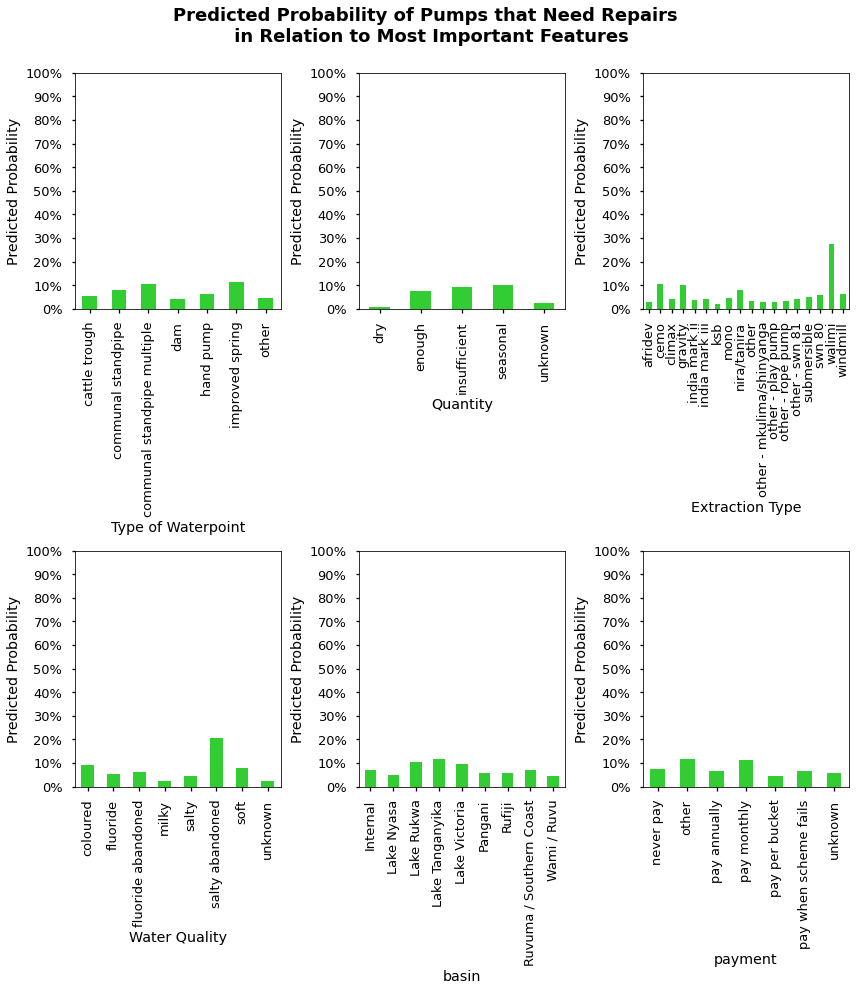

time: 1.03 s (started: 2023-01-11 08:20:18 -05:00)


In [145]:
columns = ['waterpoint_type','quantity','extraction_type','water_quality','basin','payment']
labels = ["Type of Waterpoint", "Quantity", "Extraction Type", "Water Quality",'basin','payment']
target = ["Pump_functioning_pred",'Pump_Notfunctioning_pred','Pump_NeedRepairs_pred']
color  = ['royalblue','tomato','limegreen']
data = df_predicted

nrows =2
ncols =3

with plt.style.context('seaborn-talk'):
    fig, ax_list = plt.subplots(nrows = nrows, ncols = ncols, figsize=(12, 14))  

    j=0
    for i in range(nrows):
        for u in range(ncols):
            #if (i!=2 & u!=1):
            probability_plot(data, columns[j], target[2], ax = ax_list[i,u],color=color[2]) 
            ax_list[i,u].set_xlabel(labels[j])
            j = j+1
        fig.suptitle('Predicted Probability of Pumps that Need Repairs \n in Relation to Most Important Features\n',  fontsize=18, fontweight='bold')
        fig.tight_layout();
        #fig.savefig('./images/MostImportantFeatures_Probability_BarPlot.png', dpi=300, bbox_inches='tight')

* Plot the Predicted probablities for "No" class

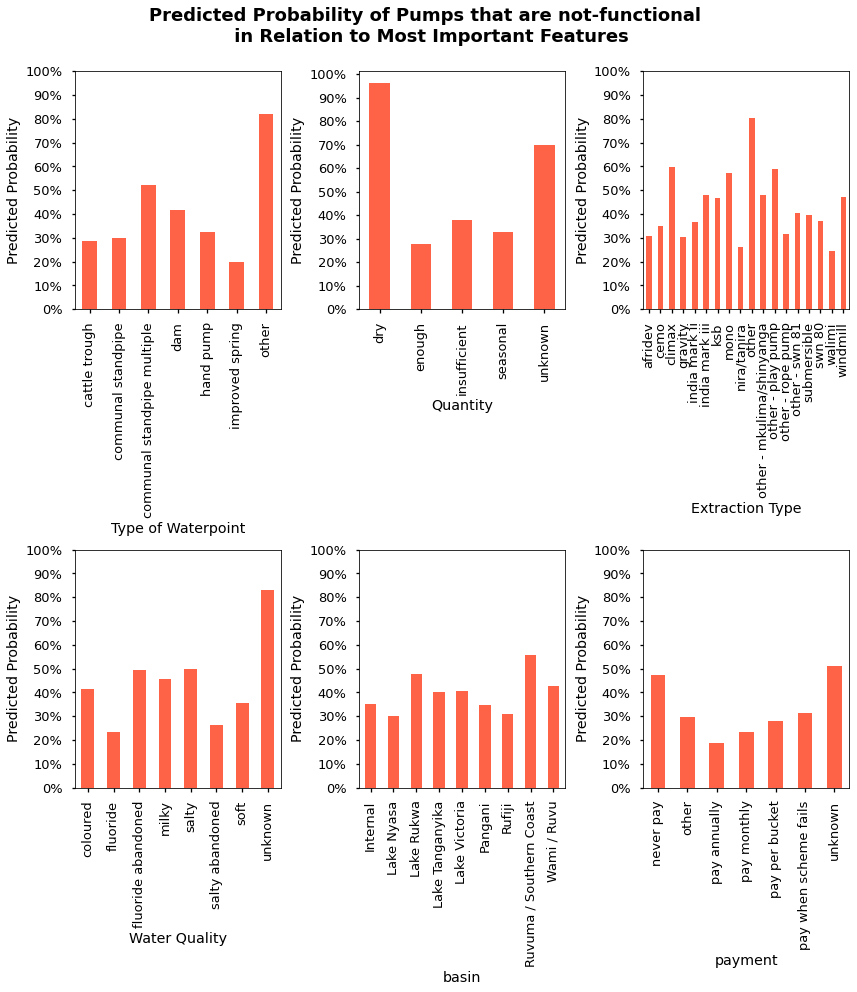

time: 2.23 s (started: 2023-01-11 08:52:14 -05:00)


In [155]:
#df_predicted
with plt.style.context('seaborn-talk'):
    fig, ax_list = plt.subplots(nrows = nrows, ncols = ncols, figsize=(12, 14))  

    j=0
    for i in range(nrows):
        for u in range(ncols):
            #if (i!=2 & u!=1):
            probability_plot(data, columns[j], target[1], ax = ax_list[i,u],color=color[1]) 
            ax_list[i,u].set_xlabel(labels[j])
            j = j+1
        fig.suptitle('Predicted Probability of Pumps that are not-functional \n in Relation to Most Important Features\n',  fontsize=18, fontweight='bold')
        fig.tight_layout();
        fig.savefig('./images/Nonfunctional_Probability_BarPlot.pdf', dpi=300, bbox_inches='tight')

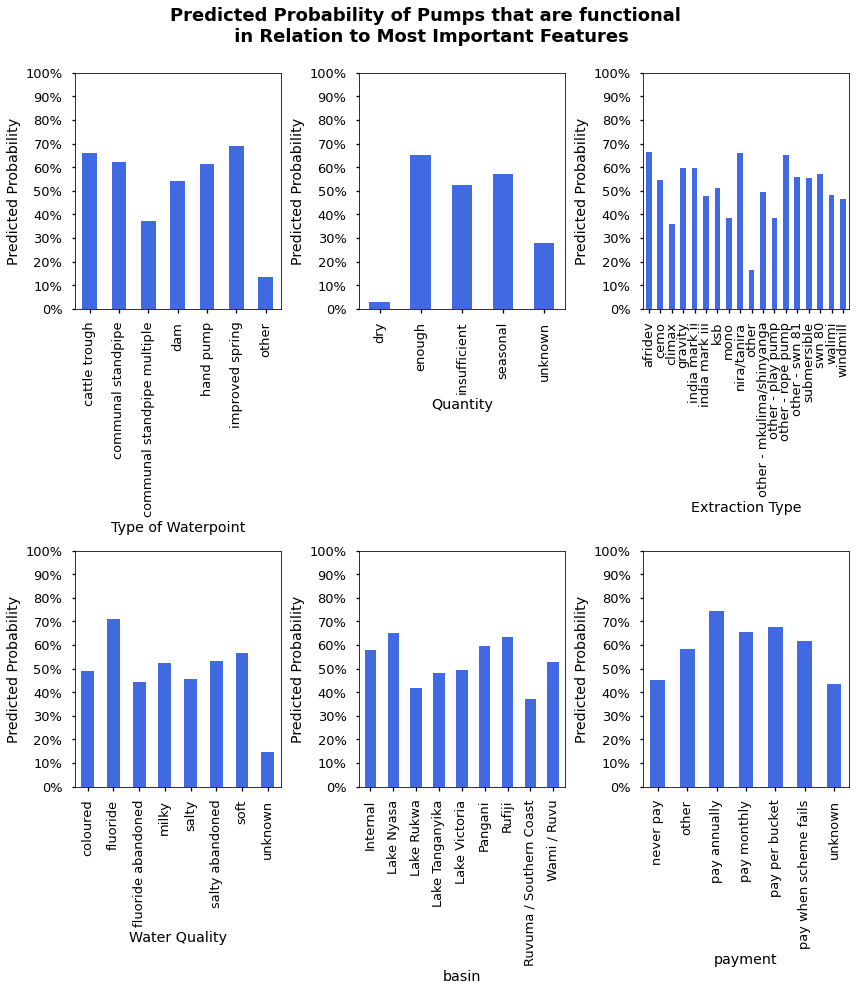

time: 986 ms (started: 2023-01-11 08:21:13 -05:00)


In [147]:
with plt.style.context('seaborn-talk'):
    fig, ax_list = plt.subplots(nrows = nrows, ncols = ncols, figsize=(12, 14))  

    j=0
    for i in range(nrows):
        for u in range(ncols):
            #if (i!=2 & u!=1):
            probability_plot(data, columns[j], target[0], ax = ax_list[i,u],color=color[0]) 
            #probability_plot(data, columns[j], target[1], ax = ax_list[i,u],color=color[1]) 
            #probability_plot(data, columns[j], target[2], ax = ax_list[i,u],color=color[2]) 
            ax_list[i,u].set_xlabel(labels[j])
            j = j+1
        fig.suptitle('Predicted Probability of Pumps that are functional \n in Relation to Most Important Features\n',  fontsize=18, fontweight='bold')
        fig.tight_layout();

## Recommendations

* The Water ministry should reallocate funds to replacing pumps at salty locations with the correct types.
* Allocate some budgets for R&D to find out the right extraction type for a given location.
* Investigate  for the reasons why for some pumps payments are never paid or unknown.
* Also look into the water pumps that are in dry areas and or whom the quantity of water is not known

#### Disclaimer
* A lot of plotting styles and notebook structure was inspired by the below mentioned github repo:
https://github.com/erdemiraysu/Predict_Seasonal_Flu_Vaccines_Project3#readme
